<a href="https://colab.research.google.com/github/Dxrksvng/eng-score-exit/blob/main/ktep_oldversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RUN all ‡πÉ‡∏´‡∏°‡πà‡πÅ‡∏•‡πâ‡∏ß GPU ‡∏´‡∏°‡∏î‡∏Ç‡∏µ‡∏î‡∏à‡∏≥‡∏Å‡∏±‡∏î‡∏à‡∏£‡πâ‡∏≤ ‡∏£‡∏∞‡πÄ‡∏ö‡∏¥‡πâ‡∏î‡πÄ‡∏ö‡∏¥‡πâ‡∏î‡πÅ‡∏´‡∏•‡πà‡∏ß**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SET UP

In [3]:
!pip install pdf2image
!apt-get install poppler-utils
!pip install jiwer
!pip install pytesseract
!pip install easyocr
!pip install transformers torch sentencepiece

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 0s (406 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 48.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# Tranfrom to image (.png) AUTO


In [ ]:
import os
import cv2
import numpy as np
from pdf2image import convert_from_path

# --- 1. ‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ ---

# ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ï‡πâ‡∏ô‡∏ó‡∏≤‡∏á (PDF, JPG, etc.)
INPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/dataset'

# ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û .png ‡∏ó‡∏µ‡πà‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏™‡∏£‡πá‡∏à‡πÅ‡∏•‡πâ‡∏ß
OUTPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-tran-to-img'

# --- 2. ‡πÇ‡∏Ñ‡πâ‡∏î‡∏´‡∏•‡∏±‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå ---

def main():
    """
    ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
    """
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏õ‡∏•‡∏≤‡∏¢‡∏ó‡∏≤‡∏á‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ï‡πâ‡∏ô‡∏ó‡∏≤‡∏á
    files_to_process = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.pdf', '.png', '.jpg', '.jpeg'))]

    if not files_to_process:
        print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏µ‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏î‡πâ‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {INPUT_DIR}")
        return

    print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î {len(files_to_process)} ‡πÑ‡∏ü‡∏•‡πå ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏î‡∏≥‡πÄ‡∏ô‡∏¥‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á...")

    # ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏ó‡∏µ‡∏•‡∏∞‡πÑ‡∏ü‡∏•‡πå
    for filename in files_to_process:
        try:
            filepath = os.path.join(INPUT_DIR, filename)

            # --- ‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå ---
            if filename.lower().endswith('.pdf'):
                # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô PDF ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ pdf2image ‡πÅ‡∏õ‡∏•‡∏á‡∏´‡∏ô‡πâ‡∏≤‡πÅ‡∏£‡∏Å
                images = convert_from_path(filepath)
                bgr_image = np.array(images[0])
                bgr_image = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2BGR)
            else:
                # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ OpenCV ‡∏≠‡πà‡∏≤‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á
                bgr_image = cv2.imread(filepath)

            # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
            if bgr_image is None:
                print(f"  -> ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå: {filename}, ‡∏Ç‡∏≠‡∏Ç‡πâ‡∏≤‡∏°‡πÑ‡∏ü‡∏•‡πå‡∏ô‡∏µ‡πâ")
                continue

            # --- ‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå ---
            # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô .png ‡πÄ‡∏™‡∏°‡∏≠
            new_filename = f"{os.path.splitext(filename)[0]}.png"
            save_path = os.path.join(OUTPUT_DIR, new_filename)

            # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û
            cv2.imwrite(save_path, bgr_image)

            print(f"  -> ‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå '{filename}' ‡πÄ‡∏õ‡πá‡∏ô '{new_filename}' ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡πÅ‡∏•‡πâ‡∏ß")

        except Exception as e:
            print(f"  !!!! ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Å‡∏±‡∏ö‡πÑ‡∏ü‡∏•‡πå {filename}: {e}")

    print("-" * 50)
    print("‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô!")
    print(f"‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û .png ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏ñ‡∏π‡∏Å‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ß‡πâ‡∏ó‡∏µ‡πà: {OUTPUT_DIR}")


# ‡∏™‡∏±‡πà‡∏á‡πÉ‡∏´‡πâ‡πÇ‡∏õ‡∏£‡πÅ‡∏Å‡∏£‡∏°‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏£‡∏±‡∏ô‡πÑ‡∏ü‡∏•‡πå‡∏ô‡∏µ‡πâ
if __name__ == "__main__":
    main()

# Preprocess

**Test single image**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ‡∏≠‡πà‡∏≤‡∏ô‡∏†‡∏≤‡∏û
image = cv2.imread('/content/drive/MyDrive/kmitl_dataset/final-tran-to-img/KMITL-TEP PILOT-1.png')  # ‡πÉ‡∏™‡πà‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£

# ‡πÅ‡∏õ‡∏•‡∏á‡∏†‡∏≤‡∏û‡πÄ‡∏õ‡πá‡∏ô HSV ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏¢‡∏Å‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏™‡∏µ‡∏Ç‡∏≤‡∏ß
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡πà‡∏ß‡∏á‡∏™‡∏µ‡∏î‡∏≥‡πÉ‡∏ô HSV
lower_black = np.array([0, 0, 0])  # ‡∏Ñ‡πà‡∏≤‡∏™‡∏µ‡∏î‡∏≥‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î ‡∏î‡∏≥‡∏™‡∏ô‡∏¥‡∏ó
upper_black = np.array([255, 255, 110])  # ‡∏Ñ‡πà‡∏≤‡∏™‡∏µ‡∏î‡∏≥‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î ‡∏î‡∏≥‡∏≠‡πà‡∏≠‡∏ô
# H ‡∏™‡∏µ
#S ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏°‡∏™‡∏µ 0-255 (‡πÑ‡∏°‡πà‡∏™‡∏î-‡∏™‡∏î‡∏°‡∏≤‡∏Å)
#V ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ß‡πà‡∏≤‡∏á ‡∏î‡∏≥-‡∏™‡∏ß‡πà‡∏≤‡∏á‡∏™‡∏∏‡∏î


# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡πà‡∏ß‡∏á‡∏™‡∏µ‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô‡πÉ‡∏ô HSV
lower_blue = np.array([90, 30, 50])  # ‡∏Ñ‡πà‡∏≤‡∏™‡∏µ‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î
upper_blue = np.array([130, 255, 255])  # ‡∏Ñ‡πà‡∏≤‡∏™‡∏µ‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Mask ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏µ‡∏î‡∏≥‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô
mask_black = cv2.inRange(hsv, lower_black, upper_black)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# ‡∏£‡∏ß‡∏° Mask ‡∏™‡∏µ‡∏î‡∏≥‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô
mask = cv2.bitwise_or(mask_black, mask_blue)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏û‡∏∑‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏á‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏™‡∏µ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û
background_color = cv2.mean(image, mask=cv2.bitwise_not(mask))[:3]  # ‡∏´‡∏≤‡∏Ñ‡πà‡∏≤‡∏™‡∏µ‡∏û‡∏∑‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏á
background = np.full_like(image, background_color, dtype=np.uint8)

# ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏î‡πâ‡∏ß‡∏¢‡∏û‡∏∑‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏á
inverted_mask = cv2.bitwise_not(mask)
result = cv2.bitwise_and(background, background, mask=inverted_mask)
final_result = cv2.bitwise_or(image & mask[:, :, None], result)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
cv2_imshow(image)
cv2_imshow(final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏†‡∏≤‡∏û‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
cv2.imwrite('output.png', final_result)


**AUTO Preprocess**

In [ ]:
import os
import cv2
import numpy as np

# --- 1. ‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ ---

# ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏ï‡πâ‡∏ô‡∏ó‡∏≤‡∏á
INPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-tran-to-img'

# ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡πÅ‡∏•‡πâ‡∏ß
OUTPUT_DIR = '/content/drive/MyDrive/kmitl_dataset/final-preprecessed'


# ---. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏†‡∏≤‡∏û (‡∏ô‡∏≥‡∏°‡∏≤‡∏à‡∏≤‡∏Å‡πÇ‡∏Ñ‡πâ‡∏î‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì) ---

def process_image_with_color_mask(image):
    """
    ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏†‡∏≤‡∏û‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡∏™‡∏µ (Color Masking)
    ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡∏á‡πÑ‡∏ß‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏™‡∏µ‡∏î‡∏≥‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô
    """
    # ‡πÅ‡∏õ‡∏•‡∏á‡∏†‡∏≤‡∏û‡πÄ‡∏õ‡πá‡∏ô HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡πà‡∏ß‡∏á‡∏™‡∏µ‡∏î‡∏≥‡πÉ‡∏ô HSV
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([255, 255, 110])

    # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡πà‡∏ß‡∏á‡∏™‡∏µ‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô‡πÉ‡∏ô HSV
    lower_blue = np.array([90, 30, 50])
    upper_blue = np.array([130, 255, 255])

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á Mask ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏µ‡∏î‡∏≥‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô
    mask_black = cv2.inRange(hsv, lower_black, upper_black)
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # ‡∏£‡∏ß‡∏° Mask ‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏™‡∏µ‡πÄ‡∏Ç‡πâ‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô
    mask = cv2.bitwise_or(mask_black, mask_blue)

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏û‡∏∑‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏á‡∏™‡∏µ‡∏Ç‡∏≤‡∏ß (‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ OCR ‡∏≠‡πà‡∏≤‡∏ô‡∏á‡πà‡∏≤‡∏¢)
    background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

    # ‡πÉ‡∏ä‡πâ mask ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡∏á‡πÑ‡∏ß‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£ (‡∏™‡∏µ‡∏î‡∏≥‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô)
    # ‡πÅ‡∏•‡∏∞‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏™‡πà‡∏ß‡∏ô‡∏≠‡∏∑‡πà‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏û‡∏∑‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏á‡∏™‡∏µ‡∏Ç‡∏≤‡∏ß
    inverted_mask = cv2.bitwise_not(mask)
    background_part = cv2.bitwise_and(background, background, mask=inverted_mask)
    text_part = cv2.bitwise_and(image, image, mask=mask)

    final_result = cv2.add(text_part, background_part)

    return final_result

# --- 3. ‡πÇ‡∏Ñ‡πâ‡∏î‡∏´‡∏•‡∏±‡∏Å‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÅ‡∏ö‡∏ö‡∏≠‡∏±‡∏ï‡πÇ‡∏ô‡∏°‡∏±‡∏ï‡∏¥ ---

def main():
    """
    ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏Å‡∏±‡∏ö‡∏ó‡∏∏‡∏Å‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå
    """
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏õ‡∏•‡∏≤‡∏¢‡∏ó‡∏≤‡∏á‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ï‡πâ‡∏ô‡∏ó‡∏≤‡∏á
    files_to_process = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not files_to_process:
        print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {INPUT_DIR}")
        return

    print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î {len(files_to_process)} ‡πÑ‡∏ü‡∏•‡πå ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏î‡∏≥‡πÄ‡∏ô‡∏¥‡∏ô‡∏Å‡∏≤‡∏£...")

    # ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏ó‡∏µ‡∏•‡∏∞‡πÑ‡∏ü‡∏•‡πå
    for filename in files_to_process:
        try:
            filepath = os.path.join(INPUT_DIR, filename)

            # ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û
            original_image = cv2.imread(filepath)

            if original_image is None:
                print(f"  -> ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå: {filename}, ‡∏Ç‡∏≠‡∏Ç‡πâ‡∏≤‡∏°‡πÑ‡∏ü‡∏•‡πå‡∏ô‡∏µ‡πâ")
                continue

            # ‡∏™‡πà‡∏á‡∏†‡∏≤‡∏û‡πÑ‡∏õ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì
            processed_image = process_image_with_color_mask(original_image)

            # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
            save_path = os.path.join(OUTPUT_DIR, filename)
            cv2.imwrite(save_path, processed_image)

            print(f"  -> ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÑ‡∏ü‡∏•‡πå '{filename}' ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡πÅ‡∏•‡πâ‡∏ß")

        except Exception as e:
            print(f"  !!!! ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Å‡∏±‡∏ö‡πÑ‡∏ü‡∏•‡πå {filename}: {e}")

    print("-" * 50)
    print("‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô!")
    print(f"‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÅ‡∏•‡πâ‡∏ß‡∏ñ‡∏π‡∏Å‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ß‡πâ‡∏ó‡∏µ‡πà: {OUTPUT_DIR}")


# ‡∏™‡∏±‡πà‡∏á‡πÉ‡∏´‡πâ‡πÇ‡∏õ‡∏£‡πÅ‡∏Å‡∏£‡∏°‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ó‡∏≥‡∏á‡∏≤‡∏ô
if __name__ == "__main__":
    main()

# OCR AUTOMATE

**pytesseract**

In [4]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import pytesseract

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
MODEL_NAME = 'Pytesseract'
APPROACH_NAME = 'Pure OCR'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"


# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ ---

def parse_score(text):
    if not text: return None, None
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# ‚¨áÔ∏è‚¨áÔ∏è ‡∏ô‡∏≥‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏°‡∏≤‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î Total Score ‚¨áÔ∏è‚¨áÔ∏è
def parse_pytesseract_pure_ocr(text):
    result = {}
    valid_levels = {"A1", "A2", "B1", "B2", "C1", "C2"}
    lines = [l.strip().replace('‚Äô', "'").replace('‚Äì', '-').replace('!', '1').replace('I', '1').replace('l', '1') for l in text.split('\n') if l.strip()]
    prev = ""

    # ‡πÉ‡∏ä‡πâ Regex ‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥
    full_text = "\n".join(lines)

    # Name
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', full_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()

    # Application No.
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', full_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()

    # Date
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', full_text, re.IGNORECASE)
    if date_match:
        # ‡πÄ‡∏≠‡∏≤‡πÅ‡∏Ñ‡πà‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏ú‡∏∑‡πà‡∏≠‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏Ç‡∏∂‡πâ‡∏ô‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÉ‡∏´‡∏°‡πà‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î
        result["test_date"] = date_match.group(1).strip().split('\n')[0]

    # Skill Scores (‡πÉ‡∏ä‡πâ Logic ‡πÄ‡∏î‡∏¥‡∏°‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏õ‡πá‡∏ô‡∏ê‡∏≤‡∏ô ‡πÅ‡∏ï‡πà‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡∏à‡∏≤‡∏Å full_text)
    score_pattern_full = r'([A-Z][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", full_text, re.IGNORECASE)
        if m:
            # ‡πÅ‡∏¢‡∏Å Level ‡πÅ‡∏•‡∏∞ Score ‡∏à‡∏≤‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
            score_text = m.group(1)
            level, score = parse_score(score_text)
            if level in valid_levels:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score

    # Total Score (‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ï‡∏£‡∏£‡∏Å‡∏∞‡πÉ‡∏´‡∏°‡πà)
    all_scores_text = re.findall(score_pattern_full, full_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")

    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score

    return result

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    img = cv2.imread(image_path)

    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)

    extracted_raw = parse_pytesseract_pure_ocr(text)

    # ‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ‡∏°‡∏≤‡∏à‡∏±‡∏î‡∏•‡∏á Dictionary
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": extracted_raw.get('grammar_level'),
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": extracted_raw.get('grammar_score'),
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": extracted_raw.get('reading_level'),
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": extracted_raw.get('reading_score'),
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": extracted_raw.get('speaking_level'),
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": extracted_raw.get('speaking_score'),
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": extracted_raw.get('writing_level'),
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": extracted_raw.get('writing_score'),
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": extracted_raw.get('total_level'),
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": extracted_raw.get('total_score'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
# ... (‡πÇ‡∏Ñ‡πâ‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ö‡πÄ‡∏ß‡∏≠‡∏£‡πå‡∏ä‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£) ...
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) ---
# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ({APPROACH_NAME}) ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ Pytesseract (Pure OCR) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 7 (KMITL-TEP PILOT-7.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 8 (KMITL-TEP PI

**‡∏õ‡∏£‡∏±‡∏ö‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏≠‡πà‡∏≤‡∏ô‡∏Ñ‡πà‡∏≤‡πÑ‡∏î‡πâ‡πÅ‡∏°‡πà‡∏ô‡πÜ‡∏Å‡πà‡∏≠‡∏ô**

In [5]:
# 1. IMPORT LIBRARIES
import cv2
import pytesseract
import re
import os
import pandas as pd
import json # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå Dictionary ‡πÉ‡∏´‡πâ‡∏≠‡πà‡∏≤‡∏ô‡∏á‡πà‡∏≤‡∏¢

# 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì (‡πÑ‡∏°‡πà‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á)
def extract_ktep_key_value(text):
    result = {}
    valid_levels = {"A1", "A2", "B1", "B2", "C1", "C2"}
    lines = [l.strip().replace('‚Äô', "'").replace('‚Äì', '-').replace('!', '1').replace('I', '1') for l in text.split('\n') if l.strip()]
    prev = ""
    # ‡πÄ‡∏û‡∏¥‡πà‡∏° print(lines) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ä‡πà‡∏ß‡∏¢‡∏î‡∏µ‡∏ö‡∏±‡∏Å ‡∏ß‡πà‡∏≤ Tesseract ‡∏≠‡πà‡∏≤‡∏ô‡∏≠‡∏∞‡πÑ‡∏£‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏ö‡πâ‡∏≤‡∏á
    print("--- ‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà Tesseract ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ (‡πÅ‡∏ö‡πà‡∏á‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÅ‡∏•‡πâ‡∏ß) ---")
    print(lines)
    print("-------------------------------------------------")


    for idx, line in enumerate(lines):
        # Name & Application No.
        if "Name:" in line and "Application No." in line:
            name = re.search(r'Name:\s*(.*?)\s*Application No', line, re.IGNORECASE)
            app_no = re.search(r'Application No\.?:\s*(\S+)', line, re.IGNORECASE)
            if name:
                result["name"] = name.group(1).strip()
            if app_no:
                result["application_no"] = app_no.group(1).strip()

        # fallback ‡πÅ‡∏¢‡∏Å‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î
        if "Name:" in line and idx + 1 < len(lines) and "name" not in result:
            result["name"] = lines[idx + 1].strip()
        if "Application No." in line and idx + 1 < len(lines) and "application_no" not in result:
            app_no_fallback = re.search(r'\d{3}', lines[idx + 1])
            if app_no_fallback:
                result["application_no"] = app_no_fallback.group()
        # Date
        if "Date of test Administration" in line:
            date_match = re.search(r'Date of test Administration:\s*(.+)', line, re.IGNORECASE)
            if date_match:
                result["test_date"] = date_match.group(1).strip()
        elif "June" in line or "May" in line or "July" in line:
            date_match = re.search(r"(June|July|May)\s+\d{1,2},\s+\d{4}", line)
            if date_match and "test_date" not in result:
                result["test_date"] = date_match.group()

        # Skills: ‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
        for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
            if skill.lower() + "_score" in result:
                continue
            m = re.search(rf"{skill}.*?([A-Z][12])\s*\(?(\d+)\)?", line)
            if m and m.group(1) in valid_levels:
                result[f"{skill.lower()}_level"] = m.group(1)
                result[f"{skill.lower()}_score"] = m.group(2)

        # Skills: fallback ‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏Å‡πà‡∏≠‡∏ô
        for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
            if skill.lower() + "_score" not in result and skill.lower() in prev.lower():
                m = re.search(r'([A-Z][12])\s*\(?(\d+)\)?', line)
                if m and m.group(1) in valid_levels:
                    result[f"{skill.lower()}_level"] = m.group(1)
                    result[f"{skill.lower()}_score"] = m.group(2)

        prev = line

    return result

# 3. MAIN SCRIPT FOR SINGLE IMAGE TEST
if __name__ == "__main__":
    # --- ‚öôÔ∏è ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ ---
    # ‚ùóÔ∏è‚ùóÔ∏è ‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç Path ‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏ï‡∏£‡∏á‡∏ô‡∏µ‡πâ ‚ùóÔ∏è‚ùóÔ∏è
    single_image_path = "/content/drive/MyDrive/kmitl_dataset/removebg_images/KMITL-TEP PILOT-1.png"

    # --- ‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û ---
    print(f"‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å: {single_image_path}")
    img = cv2.imread(single_image_path)

    if img is None:
        print(f"‚ùå ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î: ‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å Path ‡∏ó‡∏µ‡πà‡∏£‡∏∞‡∏ö‡∏∏")
    else:
        # --- ‡∏£‡∏±‡∏ô Tesseract OCR ---
        print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏£‡∏±‡∏ô Tesseract OCR...")
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(img, config=custom_config)

        # --- ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì ---
        print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Key-Value...")
        extracted_data = extract_ktep_key_value(text)

        # --- ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢ ---
        print("\n--- ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ ---")
        # ‡πÉ‡∏ä‡πâ json.dumps ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå Dictionary ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏° ‡∏≠‡πà‡∏≤‡∏ô‡∏á‡πà‡∏≤‡∏¢
        print(json.dumps(extracted_data, indent=4, ensure_ascii=False))

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å: /content/drive/MyDrive/kmitl_dataset/removebg_images/KMITL-TEP PILOT-1.png
‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏£‡∏±‡∏ô Tesseract OCR...
‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Key-Value...
--- ‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà Tesseract ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ (‡πÅ‡∏ö‡πà‡∏á‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÅ‡∏•‡πâ‡∏ß) ---
['KM1TL-TEP Official Score Report', 'Name: Test Takers 1 Application No.: 001', 'Date of test Administration: June 1, 2024', 'KM1TL-TEP Level B1 (68)', 'Grammar Bl (17) Reading B1 (17)', 'Speaking B1 (18) Writing B1 (16)', 'This is part of a pilot study, and the results are not applicable for official academic purposes.']
-------------------------------------------------

--- ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ ---
{
    "name": "Test Takers 1",
    "application_no": "001",
    "test_date": "June 1, 2024",
    "grammar_level": "B1",
    "grammar_score": "17",
    "reading_level": "B1",
    "reading_score": "17",
    "speaking_le

**Easy OCR**

In [6]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
MODEL_NAME = 'EasyOCR'
APPROACH_NAME = 'Pure OCR'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ ---

def parse_score(text):
    if not text: return None, None
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

def parse_pure_ocr_text(text):
    """
    Parser ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡πÜ ‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å OCR (‡πÉ‡∏ä‡πâ‡πÑ‡∏î‡πâ‡∏ó‡∏±‡πâ‡∏á Pytesseract ‡πÅ‡∏•‡∏∞ EasyOCR)
    """
    result = {}
    clean_text = text.replace('‚Äô', "'").replace('‚Äì', '-').replace('!', '1').replace('l', '1').replace('I', '1')

    # Name
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', clean_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()

    # Application No.
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', clean_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()

    # Date
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', clean_text, re.IGNORECASE)
    if date_match:
        result["test_date"] = date_match.group(1).strip().split('\n')[0]

    # Skill Scores
    score_pattern_full = r'([A-B][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", clean_text, re.IGNORECASE)
        if m:
            score_text = m.group(1)
            level, score = parse_score(score_text)
            if level:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score

    # Total Score
    all_scores_text = re.findall(score_pattern_full, clean_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")
    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score

    return result

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
# ‚¨áÔ∏è‚¨áÔ∏è ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR (‡∏ó‡∏≥‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß) ‚¨áÔ∏è‚¨áÔ∏è
print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...")
reader = easyocr.Reader(['en'])
print("‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)

    # ‚¨áÔ∏è‚¨áÔ∏è ‡πÉ‡∏ä‡πâ EasyOCR ‡∏≠‡πà‡∏≤‡∏ô‡∏†‡∏≤‡∏û‡∏ó‡∏±‡πâ‡∏á‡πÉ‡∏ö ‚¨áÔ∏è‚¨áÔ∏è
    # paragraph=True ‡∏ä‡πà‡∏ß‡∏¢‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏Å‡∏•‡πâ‡∏Å‡∏±‡∏ô ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡∏∂‡πâ‡∏ô
    raw_text_list = reader.readtext(image_path, detail=0, paragraph=True)
    text = "\n".join(raw_text_list)

    # ‡πÄ‡∏£‡∏µ‡∏¢‡∏Å‡πÉ‡∏ä‡πâ Parser ‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô‡∏Å‡∏±‡∏ö‡∏Ç‡∏≠‡∏á Pytesseract
    extracted_raw = parse_pure_ocr_text(text)

    # (‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£)
    # ...
    # ‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ‡∏°‡∏≤‡∏à‡∏±‡∏î‡∏•‡∏á Dictionary
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": extracted_raw.get('grammar_level'),
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": extracted_raw.get('grammar_score'),
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": extracted_raw.get('reading_level'),
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": extracted_raw.get('reading_score'),
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": extracted_raw.get('speaking_level'),
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": extracted_raw.get('speaking_score'),
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": extracted_raw.get('writing_level'),
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": extracted_raw.get('writing_score'),
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": extracted_raw.get('total_level'),
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": extracted_raw.get('total_score'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
# ... (‡πÇ‡∏Ñ‡πâ‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ö‡πÄ‡∏ß‡∏≠‡∏£‡πå‡∏ä‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£) ...
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) ---
# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ({APPROACH_NAME}) ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---


‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...
Progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100.0% Complete

Progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100.0% Complete‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!
--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR (Pure OCR) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 7 (KMITL-TEP PILOT-7.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 8 (KMITL-TEP PILOT-8.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏

**TRocr**

 TrOCR ‡∏ñ‡∏π‡∏Å‡∏≠‡∏≠‡∏Å‡πÅ‡∏ö‡∏ö‡∏°‡∏≤‡πÉ‡∏´‡πâ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡∏•‡∏∞ "‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î" ‡πÑ‡∏î‡πâ‡∏î‡∏µ‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏° ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡πÄ‡∏Å‡πà‡∏á‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡πÄ‡∏≠‡∏Å‡∏™‡∏≤‡∏£‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏ô‡πâ‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏£‡∏≤‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß ‡∏´‡∏≤‡∏Å‡πÄ‡∏£‡∏≤‡∏™‡πà‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏±‡πâ‡∏á‡πÉ‡∏ö‡πÉ‡∏´‡πâ TrOCR ‡∏≠‡πà‡∏≤‡∏ô‡πÇ‡∏î‡∏¢‡∏ï‡∏£‡∏á ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏°‡∏±‡∏Å‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡πÜ ‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏á ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÅ‡∏¢‡∏Å‡πÅ‡∏¢‡∏∞‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏î‡πâ‡∏¢‡∏≤‡∏Å‡∏°‡∏≤‡∏Å

‡∏î‡∏±‡∏á‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏∂‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á TrOCR ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ ‡πÅ‡∏ô‡∏ß‡∏ó‡∏≤‡∏á‡πÑ‡∏Æ‡∏ö‡∏£‡∏¥‡∏î (Hybrid Approach) ‡∏ó‡∏µ‡πà‡∏ä‡∏≤‡∏ç‡∏â‡∏•‡∏≤‡∏î‡∏Å‡∏ß‡πà‡∏≤ ‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ:

1. ‡πÉ‡∏ä‡πâ Pytesseract ‡∏´‡∏≤‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î (Layout Detection): ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ pytesseract.image_to_data ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡πÅ‡∏Å‡∏ô‡∏´‡∏≤ "‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á" ‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ö‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡πÇ‡∏î‡∏¢‡∏≠‡∏±‡∏ï‡πÇ‡∏ô‡∏°‡∏±‡∏ï‡∏¥ (‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ Bounding Box ‡∏≠‡∏±‡∏ï‡πÇ‡∏ô‡∏°‡∏±‡∏ï‡∏¥)
2. ‡πÉ‡∏ä‡πâ TrOCR ‡∏≠‡πà‡∏≤‡∏ô‡∏ó‡∏µ‡∏•‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î (Line-by-Line OCR): ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÄ‡∏£‡∏≤‡∏£‡∏π‡πâ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÅ‡∏•‡πâ‡∏ß ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ï‡∏±‡∏î‡∏†‡∏≤‡∏û‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ô‡∏±‡πâ‡∏ô‡πÜ ‡πÅ‡∏•‡πâ‡∏ß‡∏™‡πà‡∏á‡πÉ‡∏´‡πâ TrOCR ‡∏≠‡πà‡∏≤‡∏ô ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏á‡∏≤‡∏ô‡∏ó‡∏µ‡πà TrOCR ‡∏ñ‡∏ô‡∏±‡∏î‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏°‡∏≤‡∏Å
3. ‡πÉ‡∏ä‡πâ Parser ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•: ‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏∏‡∏Å‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ó‡∏µ‡πà TrOCR ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏°‡∏≤‡∏£‡∏ß‡∏°‡∏Å‡∏±‡∏ô ‡πÅ‡∏•‡πâ‡∏ß‡πÉ‡∏ä‡πâ Parser ‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏û‡∏±‡∏í‡∏ô‡∏≤‡πÑ‡∏ß‡πâ (‡πÅ‡∏ö‡∏ö‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ö Pytesseract Pure OCR) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Key-Value ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤

In [7]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import pytesseract # ‚¨ÖÔ∏è ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏ä‡πâ‡∏´‡∏≤ Layout

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
MODEL_NAME = 'TrOCR'
APPROACH_NAME = 'Pure OCR (Hybrid)' # ‚¨ÖÔ∏è ‡∏£‡∏∞‡∏ö‡∏∏‡∏ß‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏ô‡∏ß‡∏ó‡∏≤‡∏á‡πÑ‡∏Æ‡∏ö‡∏£‡∏¥‡∏î
INDIVIDUAL_REPORT_PATH = f"/content/drive/MyDrive/kmitl_dataset/final-excel/{MODEL_NAME.lower()}_{APPROACH_NAME.replace(' ', '_').lower()}_report.xlsx"
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

def parse_pytesseract_pure_ocr(text): # ‚¨ÖÔ∏è ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ä‡πâ Parser ‡πÄ‡∏î‡∏¥‡∏°‡∏Ç‡∏≠‡∏á Pytesseract ‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢
    result = {}
    clean_text = text.replace('‚Äô', "'").replace('‚Äì', '-').replace('!', '1').replace('l', '1').replace('I', '1')
    name_match = re.search(r'Name\s*:?\s*(.*?)\s*Application', clean_text, re.DOTALL | re.IGNORECASE)
    if name_match: result["name"] = name_match.group(1).strip()
    app_no_match = re.search(r'Application\s*No\.?\s*:*\s*(\S+)', clean_text, re.IGNORECASE)
    if app_no_match: result["application_no"] = app_no_match.group(1).strip()
    date_match = re.search(r'Date of test Administration\s*:?\s*(.+)', clean_text, re.IGNORECASE)
    if date_match: result["test_date"] = date_match.group(1).strip().split('\n')[0]
    score_pattern_full = r'([A-B][1-2]\s*\(\d+\))'
    for skill in ["Grammar", "Reading", "Speaking", "Writing"]:
        m = re.search(rf"{skill}.*?({score_pattern_full})", clean_text, re.IGNORECASE)
        if m:
            level, score = parse_score(m.group(1))
            if level:
                result[f"{skill.lower()}_level"] = level
                result[f"{skill.lower()}_score"] = score
    all_scores_text = re.findall(score_pattern_full, clean_text, re.IGNORECASE)
    used_scores_text = []
    for skill in ["grammar", "reading", "speaking", "writing"]:
        if f"{skill}_level" in result:
             used_scores_text.append(f"{result[f'{skill}_level']} ({result[f'{skill}_score']})")
    remaining_scores = [s for s in all_scores_text if s not in used_scores_text]
    if remaining_scores:
        total_level, total_score = parse_score(remaining_scores[0])
        result["total_level"] = total_level
        result["total_score"] = total_score
    return result

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))], key=get_id_from_filename)
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• (TrOCR Hybrid) ---
# ‚¨áÔ∏è ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• TrOCR (‡∏ó‡∏≥‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß)
print("--- ü§ñ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• TrOCR ---")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‡∏à‡∏∞‡πÉ‡∏ä‡πâ Device: {device}")
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed').to(device)
print("--- ‚úÖ ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ---\n")

results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    img = cv2.imread(image_path)

    # ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è ‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Hybrid Approach ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è
    # 1. ‡πÉ‡∏ä‡πâ Pytesseract ‡∏´‡∏≤‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î (Layout Detection)
    line_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DATAFRAME)
    line_data = line_data[line_data.conf > 30].dropna(subset=['text'])

    recognized_lines = []
    # 2. ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡∏•‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏î‡πâ‡∏ß‡∏¢ TrOCR
    for line_num in line_data['line_num'].unique():
        line_df = line_data[line_data['line_num'] == line_num]
        if not line_df.empty:
            # ‡∏´‡∏≤ Bounding Box ‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î
            x, y, w, h = (line_df.left.min(), line_df.top.min(),
                          line_df.left.max() + line_df.width.max() - line_df.left.min(),
                          line_df.top.max() + line_df.height.max() - line_df.top.min())

            # ‡∏ï‡∏±‡∏î‡∏†‡∏≤‡∏û‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î
            line_image = img[y:y+h, x:x+w]

            # ‡∏™‡πà‡∏á‡∏†‡∏≤‡∏û‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÉ‡∏´‡πâ TrOCR ‡∏≠‡πà‡∏≤‡∏ô
            if line_image.size > 0:
                line_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)
                pixel_values = processor(images=line_rgb, return_tensors="pt").pixel_values.to(device)
                generated_ids = model.generate(pixel_values)
                generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
                recognized_lines.append(generated_text)

    # 3. ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å TrOCR ‡πÅ‡∏•‡πâ‡∏ß‡∏™‡πà‡∏á‡πÉ‡∏´‡πâ Parser
    full_text = "\n".join(recognized_lines)
    extracted_raw = parse_pytesseract_pure_ocr(full_text)

    # (‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£)
    # ...
    # (‡∏™‡πà‡∏ß‡∏ô Parse ‡πÅ‡∏•‡∏∞ Append to results_list ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })


ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
# ... (‡πÇ‡∏Ñ‡πâ‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ö‡πÄ‡∏ß‡∏≠‡∏£‡πå‡∏ä‡∏±‡∏ô‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£) ...
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) ---
# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ({APPROACH_NAME}) ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)
print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID | ‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

--- ü§ñ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• TrOCR ---
‡∏à‡∏∞‡πÉ‡∏ä‡πâ Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

--- ‚úÖ ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ---

--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ TrOCR (Pure OCR (Hybrid)) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 7 (KMITL-TEP PILOT-7.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 8 (KMITL-TEP PILOT-8.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 9 (KMITL-TEP PILOT-9.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 10 (KMITL-TEP PILOT-10.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID:

# py Auto TEST

# EZ Auto TEST

# TRocr Auto TEST

# **Pytessecrac Boxing**

In [8]:
!pip install pytesseract
import cv2
import pytesseract
import matplotlib.pyplot as plt

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡∏û‡∏¥‡∏Å‡∏±‡∏î ROI...
  - name: 'Test Takers 10'
  - application_no: '010'
  - test_date: 'June 1, 2024'
  - overall_score: 'B1 (80)'
  - grammar: 'A2 (12)'
  - reading: 'B1 (21)'
  - speaking: 'B2 (26)'
  - writing: 'B1 (21)'

--- ‡∏™‡∏£‡∏∏‡∏õ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ ---
{'name': 'Test Takers 10', 'application_no': '010', 'test_date': 'June 1, 2024', 'overall_score': 'B1 (80)', 'grammar': 'A2 (12)', 'reading': 'B1 (21)', 'speaking': 'B2 (26)', 'writing': 'B1 (21)'}


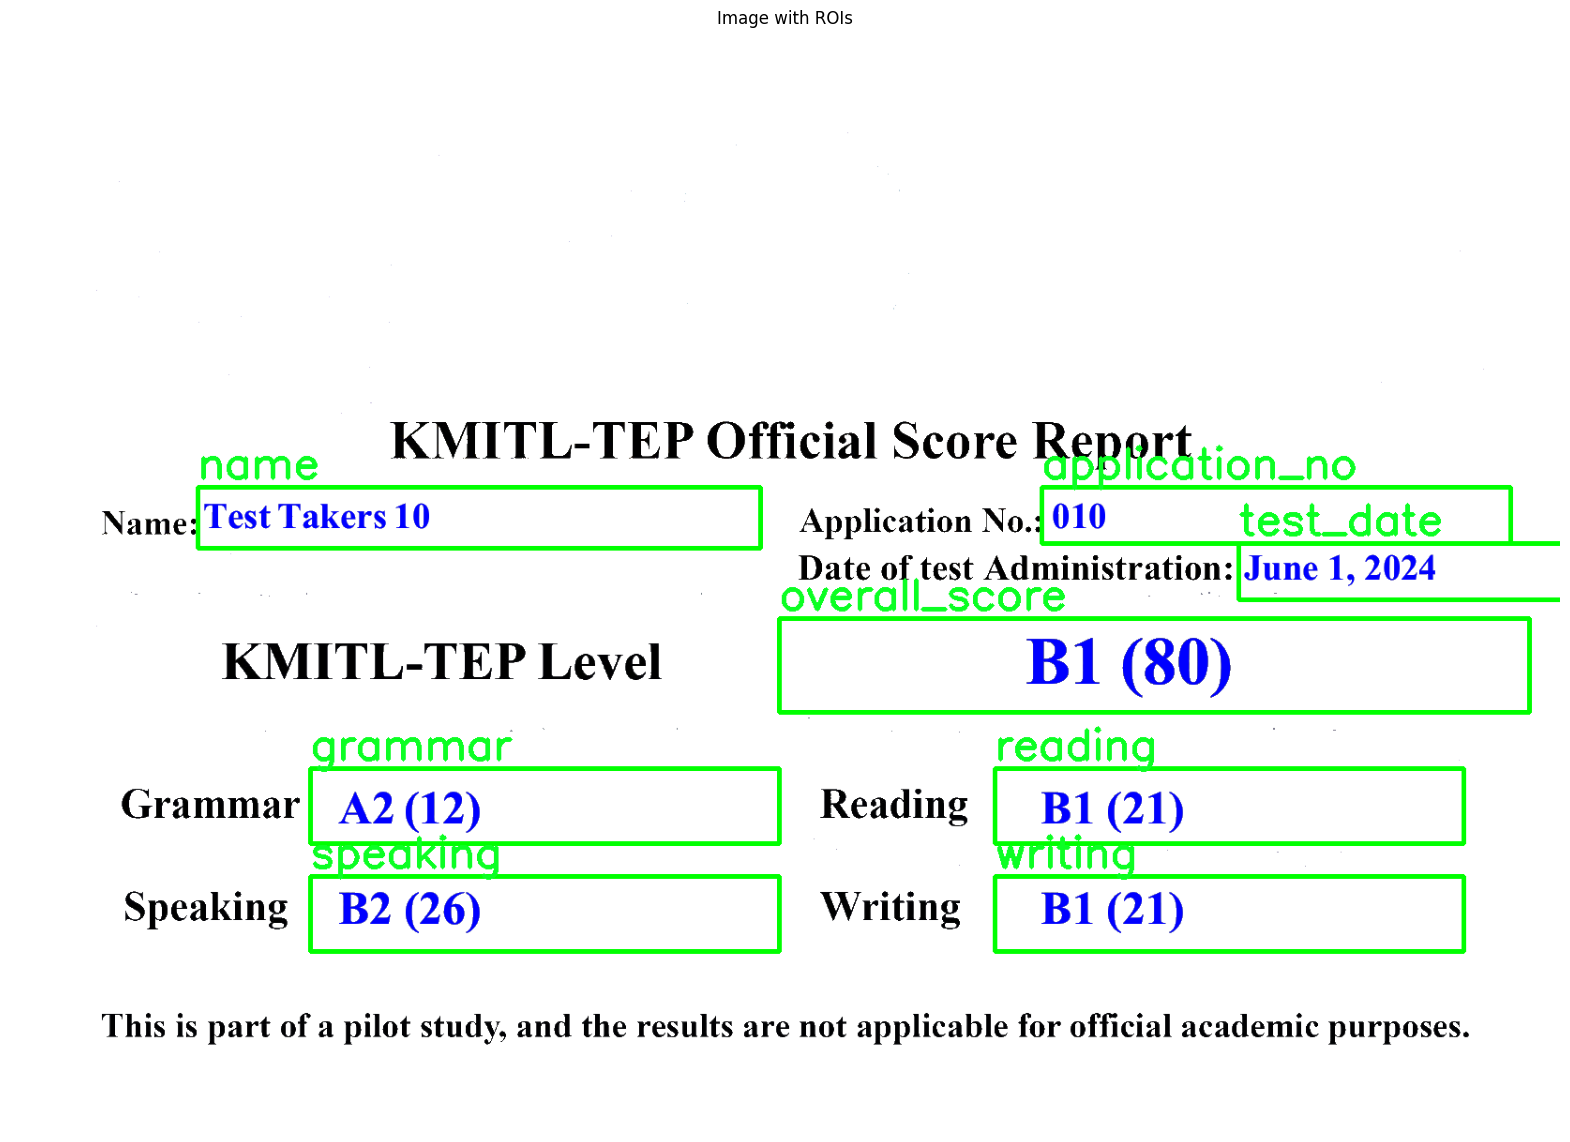

In [9]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û ---
# ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Windows, ‡∏´‡∏≤‡∏Å‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏£‡∏∞‡∏ö‡∏∏ Path ‡∏Ç‡∏≠‡∏á Tesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# ‡∏£‡∏∞‡∏ö‡∏∏ Path ‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö
IMAGE_PATH = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed/KMITL-TEP PILOT-10.png"

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏û‡∏¥‡∏Å‡∏±‡∏î‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏ô‡πÉ‡∏à (Region of Interest)
# ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ñ‡∏∑‡∏≠: (x_start, y_start, width, height)
ROI_CONFIG = {
    "name":          (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":     (1310, 545, 400, 60),
    "overall_score": (820, 625, 800, 100),
    "grammar":       (320, 785, 500, 80),
    "reading":       (1050, 785, 500, 80),
    "speaking":      (320, 900, 500, 80),
    "writing":       (1050, 900, 500, 80),
}

# --- 2. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û ---
image = cv2.imread(IMAGE_PATH)
if image is None:
    print(f"‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÇ‡∏´‡∏•‡∏î‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å: {IMAGE_PATH}")
else:
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á Dictionary ‡∏ß‡πà‡∏≤‡∏á‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ
    extracted_data = {}

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏™‡∏≥‡πÄ‡∏ô‡∏≤‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≠‡∏ö‡∏™‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏µ‡πà‡∏¢‡∏° (‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•)
    image_with_boxes = image.copy()

    # --- 3. ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏° ROI_CONFIG ---
    print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡∏û‡∏¥‡∏Å‡∏±‡∏î ROI...")
    for field_name, (x, y, w, h) in ROI_CONFIG.items():

        # 3.1 ‡∏ï‡∏±‡∏î‡∏†‡∏≤‡∏û (Crop) ‡∏ï‡∏≤‡∏°‡∏û‡∏¥‡∏Å‡∏±‡∏î‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î
        roi_image = image[y:y+h, x:x+w]

        # 3.2 ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏†‡∏≤‡∏û‡∏ä‡∏¥‡πâ‡∏ô‡πÄ‡∏•‡πá‡∏Å‡πÜ (ROI) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥
        # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô Grayscale ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥ Binarization
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û ROI ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ Tesseract ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô
        upscaled_roi = cv2.resize(gray_roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        # ‡πÉ‡∏ä‡πâ Thresholding ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏†‡∏≤‡∏û‡∏Ç‡∏≤‡∏ß-‡∏î‡∏≥‡∏ó‡∏µ‡πà‡∏Ñ‡∏°‡∏ä‡∏±‡∏î
        _, binary_roi = cv2.threshold(upscaled_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 3.3 ‡∏ó‡∏≥ OCR ‡∏Å‡∏±‡∏ö‡∏†‡∏≤‡∏û ROI ‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÅ‡∏•‡πâ‡∏ß
        # ‡πÉ‡∏ä‡πâ Page Segmentation Mode (PSM) 7 ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
        custom_config = r'--oem 3 --psm 7 -l eng'
        text = pytesseract.image_to_string(binary_roi, config=custom_config)

        # 3.4 ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÅ‡∏•‡∏∞‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        cleaned_text = text.strip()
        extracted_data[field_name] = cleaned_text
        print(f"  - {field_name}: '{cleaned_text}'")

        # 3.5 ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≠‡∏ö‡∏™‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏ö‡∏ô‡∏†‡∏≤‡∏û‡∏™‡∏≥‡πÄ‡∏ô‡∏≤‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(image_with_boxes, field_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36, 255, 12), 3)


    # --- 4. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå ---
    print("\n--- ‡∏™‡∏£‡∏∏‡∏õ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏Å‡∏±‡∏î‡πÑ‡∏î‡πâ ---")
    print(extracted_data)

    # --- 5. ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Å‡∏£‡∏≠‡∏ö ROI ---
    # ‡πÅ‡∏õ‡∏•‡∏á BGR ‡πÄ‡∏õ‡πá‡∏ô RGB ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ Matplotlib ‡πÅ‡∏™‡∏î‡∏á‡∏™‡∏µ‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
    plt.figure(figsize=(20, 15))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Image with ROIs')
    plt.axis('off')
    plt.show()

**Final auto pytes update to master file**

In [10]:
!pip install jiwer

In [11]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import pytesseract

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
# ‚¨áÔ∏è ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏Ñ‡πà 2 ‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ô‡∏µ‡πâ
MODEL_NAME = 'Pytesseract'
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/pytesseract_boxing_report.xlsx"

# Path ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏î‡∏¥‡∏°‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏ú‡∏•
APPROACH_NAME = 'Boxing'
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡∏â‡∏ö‡∏±‡∏ö‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡πâ‡∏ß‡∏¢ Pytesseract ---
results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]

        # ‚¨áÔ∏è Preprocessing ‡πÅ‡∏•‡∏∞ OCR ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Pytesseract
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        upscaled_roi = cv2.resize(gray_roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        _, binary_roi = cv2.threshold(upscaled_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        custom_config = r'--oem 3 --psm 7 -l eng'
        text = pytesseract.image_to_string(binary_roi, config=custom_config).strip()

        extracted_raw[field_name] = text

    # (‡∏™‡πà‡∏ß‡∏ô Parse ‡πÅ‡∏•‡∏∞ Append to results_list ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
# (‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£)
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) ---
# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå (2 ‡∏ä‡∏µ‡∏ï) ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID
‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ Pytesseract (Boxing) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 7 (KMITL-TEP PILOT-7.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•

# **Easy OCR Boxing**

In [12]:
!pip install easyocr
!pip install jiwer

In [13]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

Easy read B1 => Bl (L-lower) or BI (I)

--- üïµÔ∏è‚Äç‚ôÇÔ∏è ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö ROI ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡πà‡∏≠‡∏á ---
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'name': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'Test Takers 1'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'application_no': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> '001'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'test_date': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'June 1,2024'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'total': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'B1 (68)'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'grammar': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'Bl (17)'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'reading': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'Bl (17)'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'speaking': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'Bl (18)'
  - ‡∏Å‡∏•‡πà‡∏≠‡∏á 'writing': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> 'Bl (16)'


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

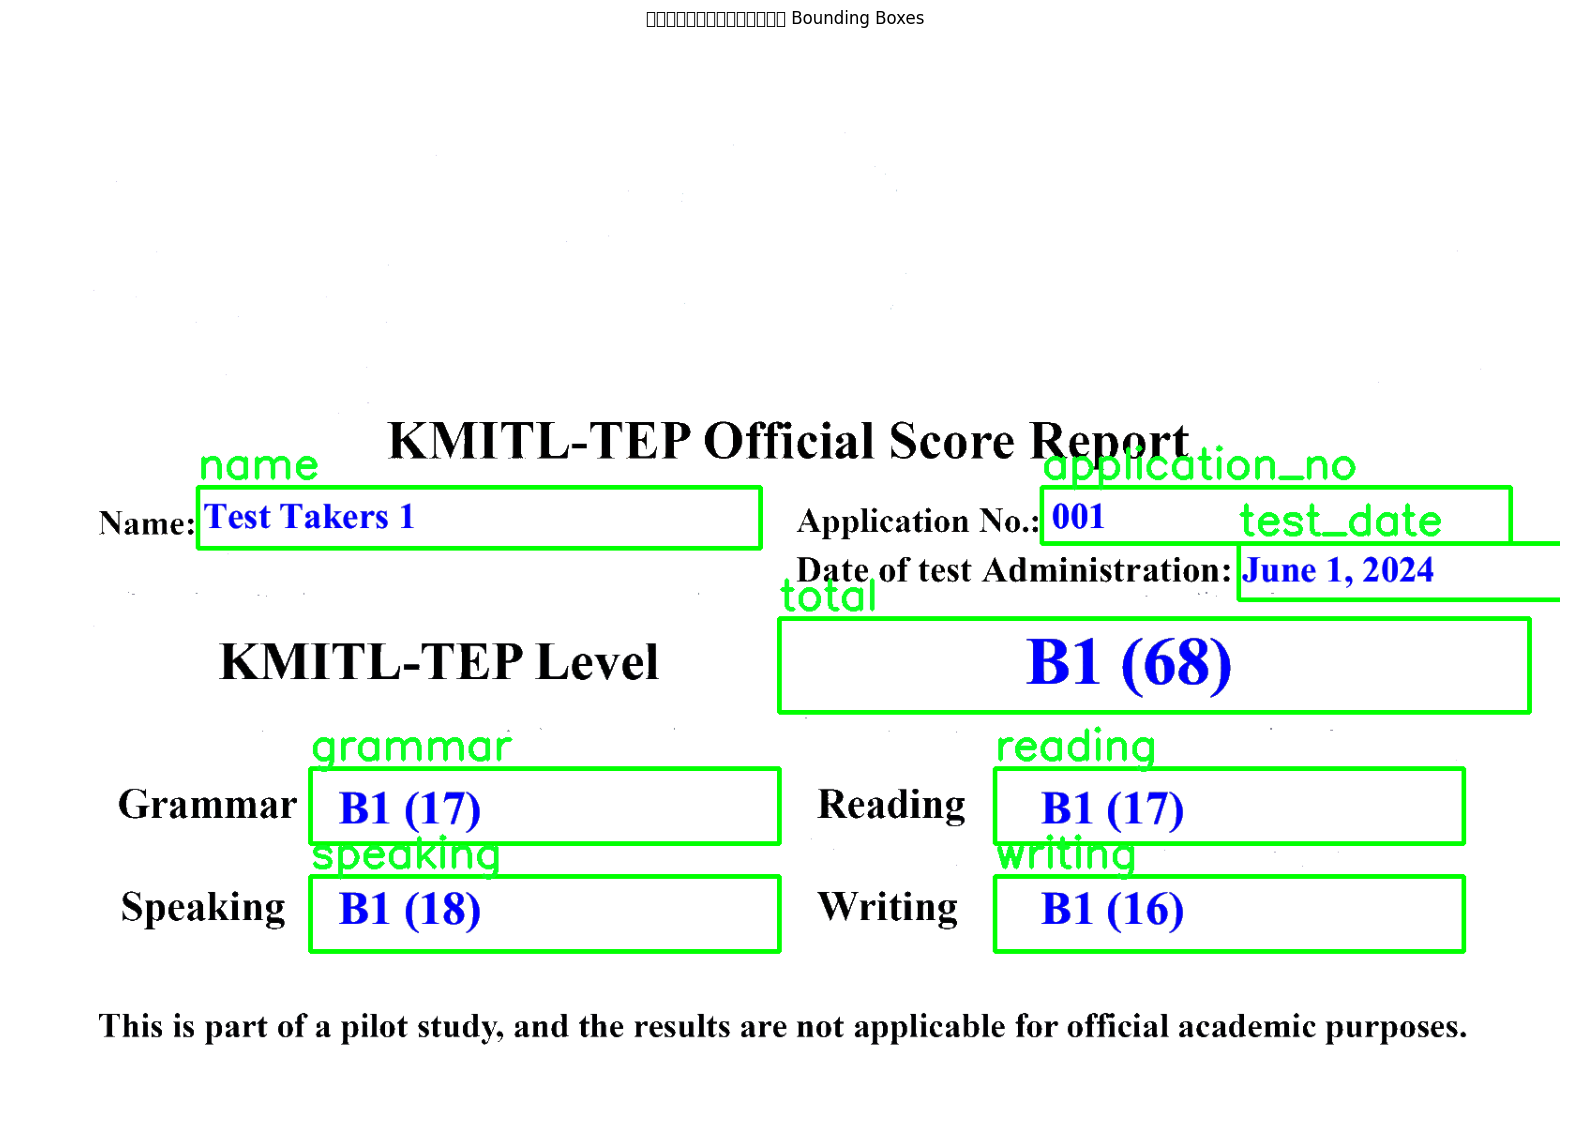

In [14]:
# --- ‡πÇ‡∏Ñ‡πâ‡∏î‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏î‡∏µ‡∏ö‡∏±‡∏Å‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö ROI ---
import cv2
import easyocr
import matplotlib.pyplot as plt

# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î Path ‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö
IMAGE_PATH_TO_DEBUG = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed/KMITL-TEP PILOT-1.png" # ‚¨ÖÔ∏è ‡∏•‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡∏£‡∏π‡∏õ‡∏ó‡∏µ‡πà 10 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á

# 2. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏û‡∏¥‡∏Å‡∏±‡∏î ROI ‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡πÉ‡∏ä‡πâ‡∏≠‡∏¢‡∏π‡πà‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô
ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# 3. ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û
reader = easyocr.Reader(['en'])
image = cv2.imread(IMAGE_PATH_TO_DEBUG)
image_with_boxes = image.copy()

print("--- üïµÔ∏è‚Äç‚ôÇÔ∏è ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö ROI ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡πà‡∏≠‡∏á ---")

# 4. ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ß‡∏≤‡∏î‡∏Å‡∏•‡πà‡∏≠‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡∏•‡∏∞‡∏ä‡πà‡∏≠‡∏á
for field_name, (x, y, w, h) in ROI_CONFIG.items():
    # ‡∏ï‡∏±‡∏î‡∏†‡∏≤‡∏û‡∏ï‡∏≤‡∏°‡∏û‡∏¥‡∏Å‡∏±‡∏î
    roi_image = image[y:y+h, x:x+w]

    # ‡∏•‡∏≠‡∏á‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏≤‡∏Å‡∏ä‡πà‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR
    ocr_result = reader.readtext(roi_image, detail=0, paragraph=True)
    text = " ".join(ocr_result).strip()

    # ‡∏û‡∏¥‡∏°‡∏û‡πå‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏•‡πà‡∏≠‡∏á‡∏ô‡∏µ‡πâ
    print(f"  - ‡∏Å‡∏•‡πà‡∏≠‡∏á '{field_name}': ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏î‡πâ -> '{text}'")

    # ‡∏ß‡∏≤‡∏î‡∏Å‡∏•‡πà‡∏≠‡∏á‡∏™‡∏µ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡∏•‡∏á‡∏ö‡∏ô‡∏†‡∏≤‡∏û‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏π‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.putText(image_with_boxes, field_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36, 255, 12), 3)

# 5. ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Å‡∏•‡πà‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á Bounding Boxes')
plt.axis('off')
plt.show()

In [15]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"
OUTPUT_EXCEL_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_full_report_with_f1.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
def parse_score(text):
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', text)
    if match:
        return match.group(1), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match:
        return int(match.group(1))
    return None

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
# (‡∏™‡πà‡∏ß‡∏ô‡πÇ‡∏Ñ‡πâ‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡πâ‡∏ß‡∏¢ EasyOCR (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...")
reader = easyocr.Reader(['en'])
print("‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text

    g_level, g_score = parse_score(extracted_raw.get('grammar', ''))
    r_level, r_score = parse_score(extracted_raw.get('reading', ''))
    s_level, s_score = parse_score(extracted_raw.get('speaking', ''))
    w_level, w_score = parse_score(extracted_raw.get('writing', ''))
    t_level, t_score = parse_score(extracted_raw.get('total', ''))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')

# ‚¨áÔ∏è 1. ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï fields_to_evaluate ‡πÉ‡∏´‡πâ‡∏Ñ‡∏£‡∏≠‡∏ö‡∏Ñ‡∏•‡∏∏‡∏°‡∏ó‡∏∏‡∏Å‡∏ü‡∏¥‡∏•‡∏î‡πå
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'),
    'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'),
    'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'),
    'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'),
    'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'),
    'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'),
    'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = eval_df[gt_col].astype(str).tolist()
    prediction = eval_df[pred_col].astype(str).tolist()

    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100

    # ‚¨áÔ∏è 2. ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Metrics ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ‡∏£‡∏ß‡∏°‡∏ñ‡∏∂‡∏á F1-Score
    error_metrics = jiwer.compute_measures(ground_truth, prediction)

    # ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢‡∏î‡πâ‡∏ß‡∏¢ .get() ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô KeyError
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Precision, Recall, ‡πÅ‡∏•‡∏∞ F1-score
    H = error_metrics.get('hits', 0)
    I = error_metrics.get('insertions', 0)
    D = error_metrics.get('deletions', 0)

    precision = H / (H + I) if (H + I) > 0 else 0
    recall = H / (H + D) if (H + D) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    evaluation_summary_list.append({
        'Field': field,
        'Accuracy (%)': round(accuracy, 2),
        'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2),
        'F1-score (%)': round(f1_score * 100, 2) # ‚¨ÖÔ∏è 3. ‡πÄ‡∏û‡∏¥‡πà‡∏° F1-score ‡πÉ‡∏ô‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå Excel ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß (2 ‡∏ä‡∏µ‡∏ï) ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {OUTPUT_EXCEL_PATH} ---")
with pd.ExcelWriter(OUTPUT_EXCEL_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà '{OUTPUT_EXCEL_PATH}'")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID
‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...
‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!
--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡

‡∏ô‡∏µ‡πà‡∏Ñ‡∏∑‡∏≠‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î:

1. EasyOCR ‡∏≠‡πà‡∏≤‡∏ô‡∏ú‡∏¥‡∏î: ‡πÇ‡∏°‡πÄ‡∏î‡∏• OCR ‡∏°‡∏±‡∏Å‡∏à‡∏∞‡∏™‡∏±‡∏ö‡∏™‡∏ô‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç 1 ‡∏Å‡∏±‡∏ö‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£ l (L ‡∏û‡∏¥‡∏°‡∏û‡πå‡πÄ‡∏•‡πá‡∏Å) ‡∏´‡∏£‡∏∑‡∏≠ I (i ‡∏û‡∏¥‡∏°‡∏û‡πå‡πÉ‡∏´‡∏ç‡πà) ‡πÉ‡∏ô‡∏Å‡∏£‡∏ì‡∏µ‡∏ô‡∏µ‡πâ ‡∏°‡∏±‡∏ô‡∏≠‡πà‡∏≤‡∏ô B1 ‡πÄ‡∏õ‡πá‡∏ô Bl
2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô parse_score ‡πÄ‡∏Ç‡πâ‡∏°‡∏á‡∏ß‡∏î‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ: ‡πÇ‡∏Ñ‡πâ‡∏î‡πÉ‡∏ô‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô parse_score ‡∏Ç‡∏≠‡∏á‡πÄ‡∏£‡∏≤‡πÉ‡∏ä‡πâ
Regular Expression r'([A-Z][1-2])' ‡∏ã‡∏∂‡πà‡∏á‡∏´‡∏°‡∏≤‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ß‡πà‡∏≤‡∏°‡∏±‡∏ô‡∏°‡∏≠‡∏á‡∏´‡∏≤ "‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏û‡∏¥‡∏°‡∏û‡πå‡πÉ‡∏´‡∏ç‡πà A-Z" ‡∏ï‡∏≤‡∏°‡∏î‡πâ‡∏ß‡∏¢ "‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç 1 ‡∏´‡∏£‡∏∑‡∏≠ 2" ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô
3. ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: ‡πÄ‡∏°‡∏∑‡πà‡∏≠ parse_score ‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏° 'Bl (17)' ‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤ ‡∏°‡∏±‡∏ô‡πÑ‡∏°‡πà‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö‡πÅ‡∏û‡∏ó‡πÄ‡∏ó‡∏¥‡∏£‡πå‡∏ô‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î (‡πÄ‡∏û‡∏£‡∏≤‡∏∞ l ‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà 1 ‡∏´‡∏£‡∏∑‡∏≠ 2) ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏à‡∏∂‡∏á‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤ (None, None) ‡∏≠‡∏≠‡∏Å‡πÑ‡∏õ ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå (Pred) ‡πÉ‡∏ô Excel ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏ß‡πà‡∏≤‡∏á‡πÄ‡∏õ‡∏•‡πà‡∏≤ ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡∏£‡∏ß‡∏ô‡πÑ‡∏õ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏Ñ‡∏£‡∏±‡∏ö

In [16]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"
OUTPUT_EXCEL_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_final_report_single_sheet.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡∏â‡∏ö‡∏±‡∏ö‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        level = match.group(1).upper()
        score = match.group(2)
        return level, score
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡πâ‡∏ß‡∏¢ EasyOCR (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...")
reader = easyocr.Reader(['en'])
print("‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text

    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))

    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) - (‡∏ô‡∏≥ F1-Score ‡∏Å‡∏•‡∏±‡∏ö‡∏°‡∏≤) ---
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

eval_df = ocr_results_df.fillna('')

fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]

    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100

    # ‡πÉ‡∏ä‡πâ compute_measures ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏ó‡∏∏‡∏Å‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏ô‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì F1-score ‡∏à‡∏≤‡∏Å‡∏≠‡∏á‡∏Ñ‡πå‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö
    H = error_metrics.get('hits', 0)
    I = error_metrics.get('insertions', 0)
    D = error_metrics.get('deletions', 0)
    S = error_metrics.get('substitutions', 0)

    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    evaluation_summary_list.append({
        'Field': field,
        'Accuracy (%)': round(accuracy, 2),
        'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2),
        'F1-score (%)': round(f1_score * 100, 2)
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå Excel ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß (‡∏ä‡∏µ‡∏ï‡πÄ‡∏î‡∏µ‡∏¢‡∏ß) --- ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {OUTPUT_EXCEL_PATH} ---")
SHEET_NAME = 'EasyOCR_Result'

with pd.ExcelWriter(OUTPUT_EXCEL_PATH, engine='openpyxl') as writer:
    # ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÅ‡∏ö‡∏ö‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Å‡πà‡∏≠‡∏ô
    ocr_results_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ (‡πÄ‡∏ß‡πâ‡∏ô 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå)
    start_col_for_summary = ocr_results_df.shape[1] + 2

    # ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏•‡∏á‡πÉ‡∏ô‡∏ä‡∏µ‡∏ï‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô
    eval_summary_df.to_excel(writer, sheet_name=SHEET_NAME, index=False, startcol=start_col_for_summary)

print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà '{OUTPUT_EXCEL_PATH}' ‡πÉ‡∏ô‡∏ä‡∏µ‡∏ï '{SHEET_NAME}'")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID
‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...
‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!
--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡

**Final Update to master file**

In [17]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import easyocr

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
MODEL_NAME = 'EasyOCR'
APPROACH_NAME = 'Boxing'

# ‚¨áÔ∏è Path ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏û‡∏≤‡∏∞ (2 ‡∏ä‡∏µ‡∏ï)
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/easyocr_boxing_report.xlsx"
# ‚¨áÔ∏è Path ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡∏â‡∏ö‡∏±‡∏ö‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match: return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. & 4. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• (‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°) ---
# ... (‡πÇ‡∏Ñ‡πâ‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á) ...
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")
print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...")
reader = easyocr.Reader(['en'])
print("‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")
results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
# (‡∏™‡πà‡∏ß‡∏ô for loop ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue
    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)
    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
        ocr_result = reader.readtext(gray_roi, detail=0, paragraph=True)
        text = " ".join(ocr_result).strip()
        extracted_raw[field_name] = text
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })
ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}

evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })

eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) --- ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è

# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå (2 ‡∏ä‡∏µ‡∏ï) ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    # ‡∏ô‡∏≥‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Model ‡πÅ‡∏•‡∏∞ Approach ‡∏≠‡∏≠‡∏Å‡∏Å‡πà‡∏≠‡∏ô‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ä‡∏µ‡∏ï‡∏™‡∏£‡∏∏‡∏õ‡∏Ç‡∏≠‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏ô‡∏µ‡πâ
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df

with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID
‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• EasyOCR...
‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!
--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ EasyOCR (Boxing) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡

# **TRocr Boxing**

In [18]:
!pip install transformers torch sentencepiece

In [19]:
import cv2
import pandas as pd
import os
import re
import jiwer
import numpy as np
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞ Path ‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ---
MODEL_NAME = 'TrOCR'
APPROACH_NAME = 'Boxing'
INDIVIDUAL_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/trocr_boxing_report.xlsx"
MASTER_OUTPUT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"

IMAGE_DIR = "/content/drive/MyDrive/kmitl_dataset/final-preprecessed"
GROUND_TRUTH_PATH = "/content/drive/MyDrive/kmitl_dataset/dataset/‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô TEP (Pilot Study)_Total_IT.xlsx"

ROI_CONFIG = {
    "name":           (200, 485, 600, 65),
    "application_no": (1100, 485, 500, 60),
    "test_date":      (1310, 545, 400, 60),
    "total":          (820, 625, 800, 100),
    "grammar":        (320, 785, 500, 80),
    "reading":        (1050, 785, 500, 80),
    "speaking":       (320, 900, 500, 80),
    "writing":        (1050, 900, 500, 80),
}

# --- 2. ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏´‡∏•‡∏∑‡∏≠ (‡∏â‡∏ö‡∏±‡∏ö‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå) ---
def parse_score(text):
    if not text: return None, None
    processed_text = text.replace('l', '1').replace('I', '1')
    match = re.search(r'([A-Z][1-2])\s*\((\d+)\)', processed_text, re.IGNORECASE)
    if match:
        return match.group(1).upper(), match.group(2)
    return None, None

def get_id_from_filename(filename):
    match = re.search(r'(\d+)\.(png|jpg|jpeg)$', filename.lower())
    if match: return int(match.group(1))
    return None

def normalize_text(text):
    if text is None: return ""
    text = str(text).strip().lower()
    if text.endswith('.0'): text = text[:-2]
    return text

# --- 3. ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏£‡∏¥‡πà‡∏° ---
# ... (‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£) ...
print("--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---")
gt_df = pd.read_excel(GROUND_TRUTH_PATH)
ground_truth_ids = set(gt_df['No.'].unique())
print(f"‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: {len(ground_truth_ids)} ID")
allowed_extensions = ['.png', '.jpg', '.jpeg']
all_files_in_dir = os.listdir(IMAGE_DIR)
image_files = [f for f in all_files_in_dir if f.lower().endswith(tuple(allowed_extensions))]
image_files.sort(key=get_id_from_filename)
print(f"‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå")
print("--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 4. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏î‡πâ‡∏ß‡∏¢ TrOCR ---
# ‚¨áÔ∏è ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞ Processor ‡∏Ç‡∏≠‡∏á TrOCR (‡∏ó‡∏≥‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß)
print("--- ü§ñ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• TrOCR ---")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‡∏à‡∏∞‡πÉ‡∏ä‡πâ Device: {device}")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed').to(device)
print("--- ‚úÖ ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ---\n")

results_list = []
print(f"--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û {len(image_files)} ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ {MODEL_NAME} ({APPROACH_NAME}) ---")
for filename in image_files:
    image_id = get_id_from_filename(filename)
    if image_id is None: continue
    gt_row = gt_df[gt_df['No.'] == image_id]
    if gt_row.empty: continue

    print(f"  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: {image_id} ({filename})")
    image_path = os.path.join(IMAGE_DIR, filename)
    image = cv2.imread(image_path)

    extracted_raw = {}
    for field_name, (x, y, w, h) in ROI_CONFIG.items():
        roi_image = image[y:y+h, x:x+w]

        # ‚¨áÔ∏è ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•‡∏î‡πâ‡∏ß‡∏¢ TrOCR
        # TrOCR ‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ preprocessing ‡πÅ‡∏ö‡∏ö‡πÄ‡∏Å‡πà‡∏≤ ‡πÅ‡∏ï‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏†‡∏≤‡∏û‡πÅ‡∏ö‡∏ö RGB
        roi_rgb = cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB)

        pixel_values = processor(images=roi_rgb, return_tensors="pt").pixel_values.to(device)
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        text = generated_text.strip()

        extracted_raw[field_name] = text

    # (‡∏™‡πà‡∏ß‡∏ô Parse ‡πÅ‡∏•‡∏∞ Append to results_list ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°)
    # ...
    g_level, g_score = parse_score(extracted_raw.get('grammar'))
    r_level, r_score = parse_score(extracted_raw.get('reading'))
    s_level, s_score = parse_score(extracted_raw.get('speaking'))
    w_level, w_score = parse_score(extracted_raw.get('writing'))
    t_level, t_score = parse_score(extracted_raw.get('total'))
    results_list.append({
        "No.": image_id,
        "Application No. (GT)": gt_row.iloc[0]["Application No."], "Application No. (Pred)": extracted_raw.get('application_no'),
        "Name (GT)": gt_row.iloc[0]["Name"], "Name (Pred)": extracted_raw.get('name'),
        "Test Date (GT)": gt_row.iloc[0]["Test Date"], "Test Date (Pred)": extracted_raw.get('test_date'),
        "Grammar_Level (GT)": gt_row.iloc[0]["Grammar_Level"], "Grammar_Level (Pred)": g_level,
        "Grammar_Score (GT)": gt_row.iloc[0]["Grammar_Score"], "Grammar_Score (Pred)": g_score,
        "Reading_Level (GT)": gt_row.iloc[0]["Reading_Level"], "Reading_Level (Pred)": r_level,
        "Reading_Score (GT)": gt_row.iloc[0]["Reading_Score"], "Reading_Score (Pred)": r_score,
        "Speaking_Level (GT)": gt_row.iloc[0]["Speaking_Level"], "Speaking_Level (Pred)": s_level,
        "Speaking_Score (GT)": gt_row.iloc[0]["Speaking_Score"], "Speaking_Score (Pred)": s_score,
        "Writing_Level (GT)": gt_row.iloc[0]["Writing_Level"], "Writing_Level (Pred)": w_level,
        "Writing_Score (GT)": gt_row.iloc[0]["Writing_Score"], "Writing_Score (Pred)": w_score,
        "Total_Level (GT)": gt_row.iloc[0]["Total_Level"], "Total_Level (Pred)": t_level,
        "Total_Score (GT)": gt_row.iloc[0]["Total_Score"], "Total_Score (Pred)": t_score,
    })

ocr_results_df = pd.DataFrame(results_list)
print("--- ‚úÖ ‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")

# --- 5. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• (Evaluation) ---
# ... (‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÄ‡∏î‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£) ...
print("--- üìä ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• ---")
eval_df = ocr_results_df.fillna('')
fields_to_evaluate = {
    'Name': ('Name (GT)', 'Name (Pred)'), 'Application No.': ('Application No. (GT)', 'Application No. (Pred)'),
    'Test Date': ('Test Date (GT)', 'Test Date (Pred)'), 'Grammar_Level': ('Grammar_Level (GT)', 'Grammar_Level (Pred)'),
    'Grammar_Score': ('Grammar_Score (GT)', 'Grammar_Score (Pred)'), 'Reading_Level': ('Reading_Level (GT)', 'Reading_Level (Pred)'),
    'Reading_Score': ('Reading_Score (GT)', 'Reading_Score (Pred)'), 'Speaking_Level': ('Speaking_Level (GT)', 'Speaking_Level (Pred)'),
    'Speaking_Score': ('Speaking_Score (GT)', 'Speaking_Score (Pred)'), 'Writing_Level': ('Writing_Level (GT)', 'Writing_Level (Pred)'),
    'Writing_Score': ('Writing_Score (GT)', 'Writing_Score (Pred)'), 'Total_Level': ('Total_Level (GT)', 'Total_Level (Pred)'),
    'Total_Score': ('Total_Score (GT)', 'Total_Score (Pred)'),
}
evaluation_summary_list = []
for field, (gt_col, pred_col) in fields_to_evaluate.items():
    ground_truth = [normalize_text(t) for t in eval_df[gt_col]]
    prediction = [normalize_text(t) for t in eval_df[pred_col]]
    accuracy = np.mean([1 if gt == pred else 0 for gt, pred in zip(ground_truth, prediction)]) * 100
    error_metrics = jiwer.compute_measures(ground_truth, prediction)
    wer = error_metrics.get('wer', 0) * 100
    cer = error_metrics.get('cer', 0) * 100
    H = error_metrics.get('hits', 0); I = error_metrics.get('insertions', 0); D = error_metrics.get('deletions', 0); S = error_metrics.get('substitutions', 0)
    precision = H / (H + I + S) if (H + I + S) > 0 else 0
    recall = H / (H + D + S) if (H + D + S) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    evaluation_summary_list.append({
        'Field': field, 'Accuracy (%)': round(accuracy, 2), 'WER (%)': round(wer, 2),
        'CER (%)': round(cer, 2), 'F1-score (%)': round(f1_score * 100, 2)
    })
eval_summary_df = pd.DataFrame(evaluation_summary_list)
eval_summary_df.insert(0, 'Approach', APPROACH_NAME)
eval_summary_df.insert(0, 'Model', MODEL_NAME)
print(eval_summary_df.to_string(index=False))
print("--- ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---\n")


# --- 6. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå (‡∏ó‡∏≥ 2 ‡∏≠‡∏¢‡πà‡∏≤‡∏á) ---
# --- 6.A: ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå (2 ‡∏ä‡∏µ‡∏ï) ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏£‡∏≤‡∏¢‡∏á‡∏≤‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ç‡∏≠‡∏á {MODEL_NAME} ‡∏•‡∏á‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå: {INDIVIDUAL_REPORT_PATH} ---")
with pd.ExcelWriter(INDIVIDUAL_REPORT_PATH, engine='openpyxl') as writer:
    ocr_results_df.to_excel(writer, sheet_name='Detailed_Results', index=False)
    eval_summary_df.drop(columns=['Model', 'Approach']).to_excel(writer, sheet_name='Evaluation_Summary', index=False)
print(f"üéâ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ü‡∏•‡πå {INDIVIDUAL_REPORT_PATH} ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

# --- 6.B: ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡∏á Master File ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü ---
print(f"--- üíæ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report: {MASTER_OUTPUT_PATH} ---")
SHEET_NAME = 'Master_Evaluation'
try:
    with pd.ExcelFile(MASTER_OUTPUT_PATH) as xls:
        master_df = pd.read_excel(xls, sheet_name=SHEET_NAME)
        master_df = master_df[(master_df['Model'] != MODEL_NAME) | (master_df['Approach'] != APPROACH_NAME)]
    combined_df = pd.concat([master_df, eval_summary_df], ignore_index=True)
except FileNotFoundError:
    print(f"‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master ‡πÄ‡∏î‡∏¥‡∏°, ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÑ‡∏ü‡∏•‡πå‡πÉ‡∏´‡∏°‡πà...")
    combined_df = eval_summary_df
with pd.ExcelWriter(MASTER_OUTPUT_PATH, engine='openpyxl') as writer:
    combined_df.to_excel(writer, sheet_name=SHEET_NAME, index=False)

print(f"üéâ ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡πÑ‡∏ü‡∏•‡πå Master Report ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à!")

--- üîç ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
‡∏û‡∏ö ID ‡πÉ‡∏ô Ground Truth ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 120 ID
‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå: 120 ‡πÑ‡∏ü‡∏•‡πå
--- ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô ---

--- ü§ñ ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• TrOCR ---
‡∏à‡∏∞‡πÉ‡∏ä‡πâ Device: cuda


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- ‚úÖ ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ---

--- üöÄ ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏™‡∏Å‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û 120 ‡πÑ‡∏ü‡∏•‡πå ‡∏î‡πâ‡∏ß‡∏¢ TrOCR (Boxing) ---
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 1 (KMITL-TEP PILOT-1.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 2 (KMITL-TEP PILOT-2.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 3 (KMITL-TEP PILOT-3.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 4 (KMITL-TEP PILOT-4.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 5 (KMITL-TEP PILOT-5.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 6 (KMITL-TEP PILOT-6.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 7 (KMITL-TEP PILOT-7.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 8 (KMITL-TEP PILOT-8.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 9 (KMITL-TEP PILOT-9.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 10 (KMITL-TEP PILOT-10.png)
  - ‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏• ID: 11 (KMITL-

# Visualization only Pure OCR

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÅ‡∏ô‡∏ß‡∏ó‡∏≤‡∏á Pure OCR ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô
‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...
‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/1_pure_ocr_overall_performance.png


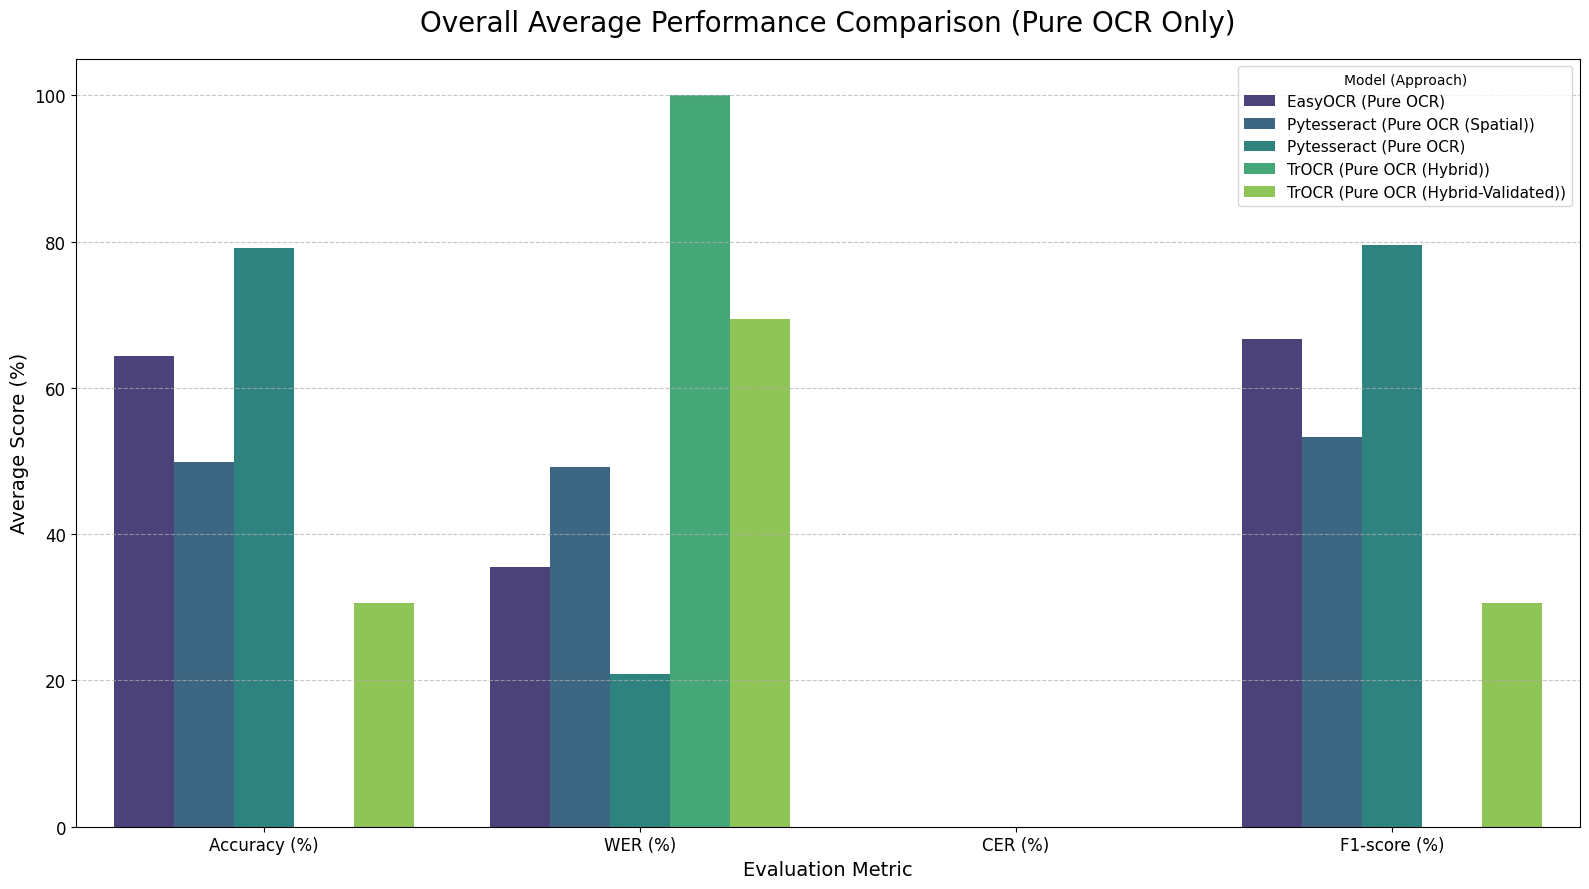

<ipython-input-23-4016833904>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Name) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Name.png


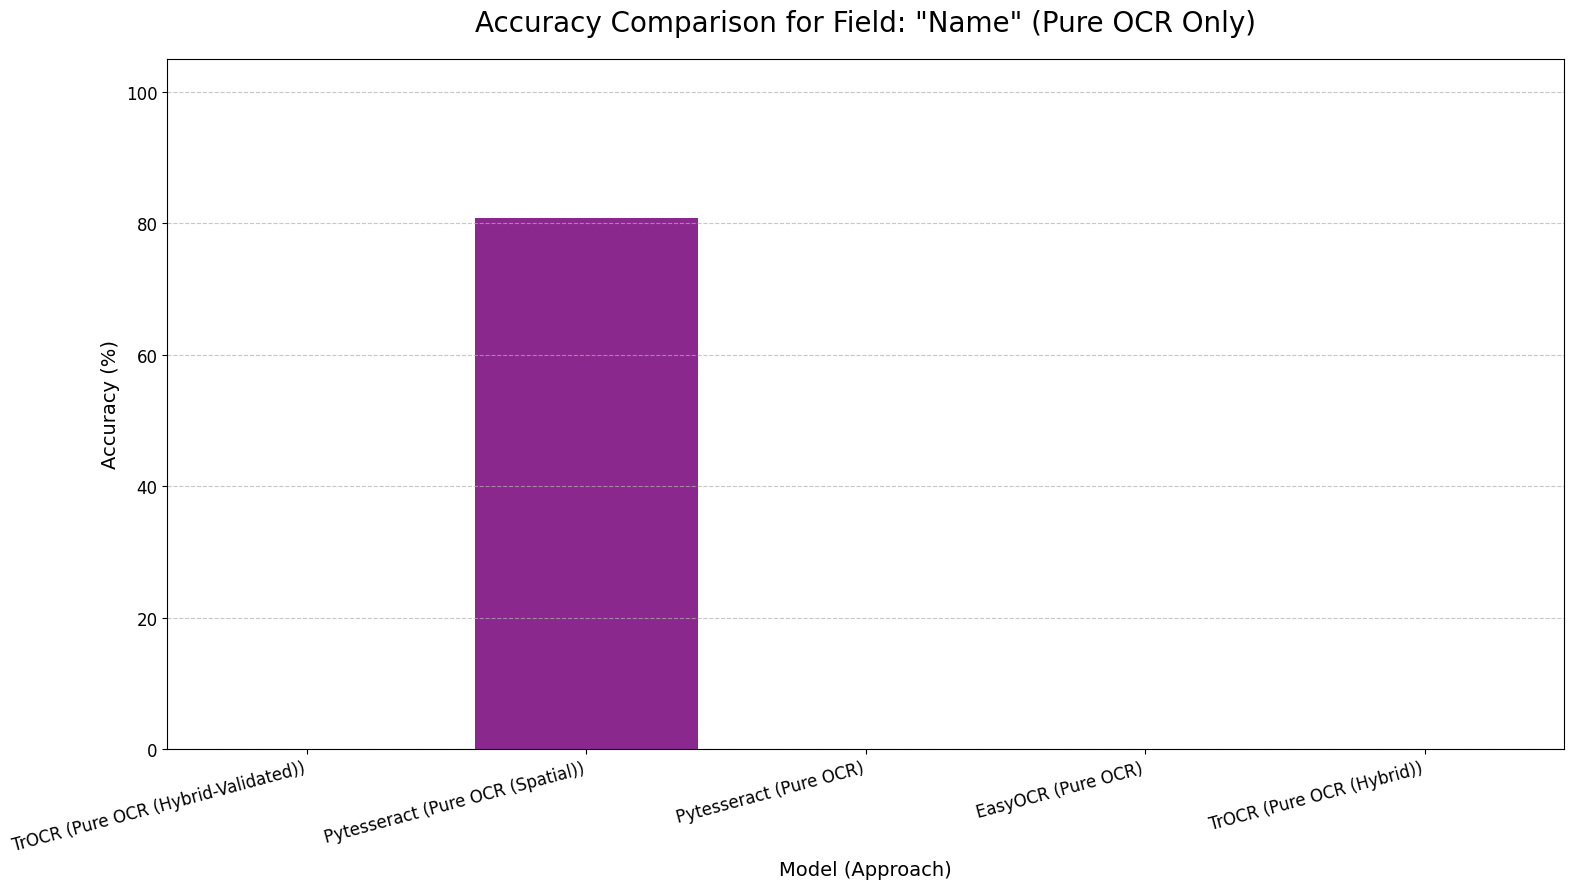

<ipython-input-23-4016833904>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Application No.) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Application_No..png


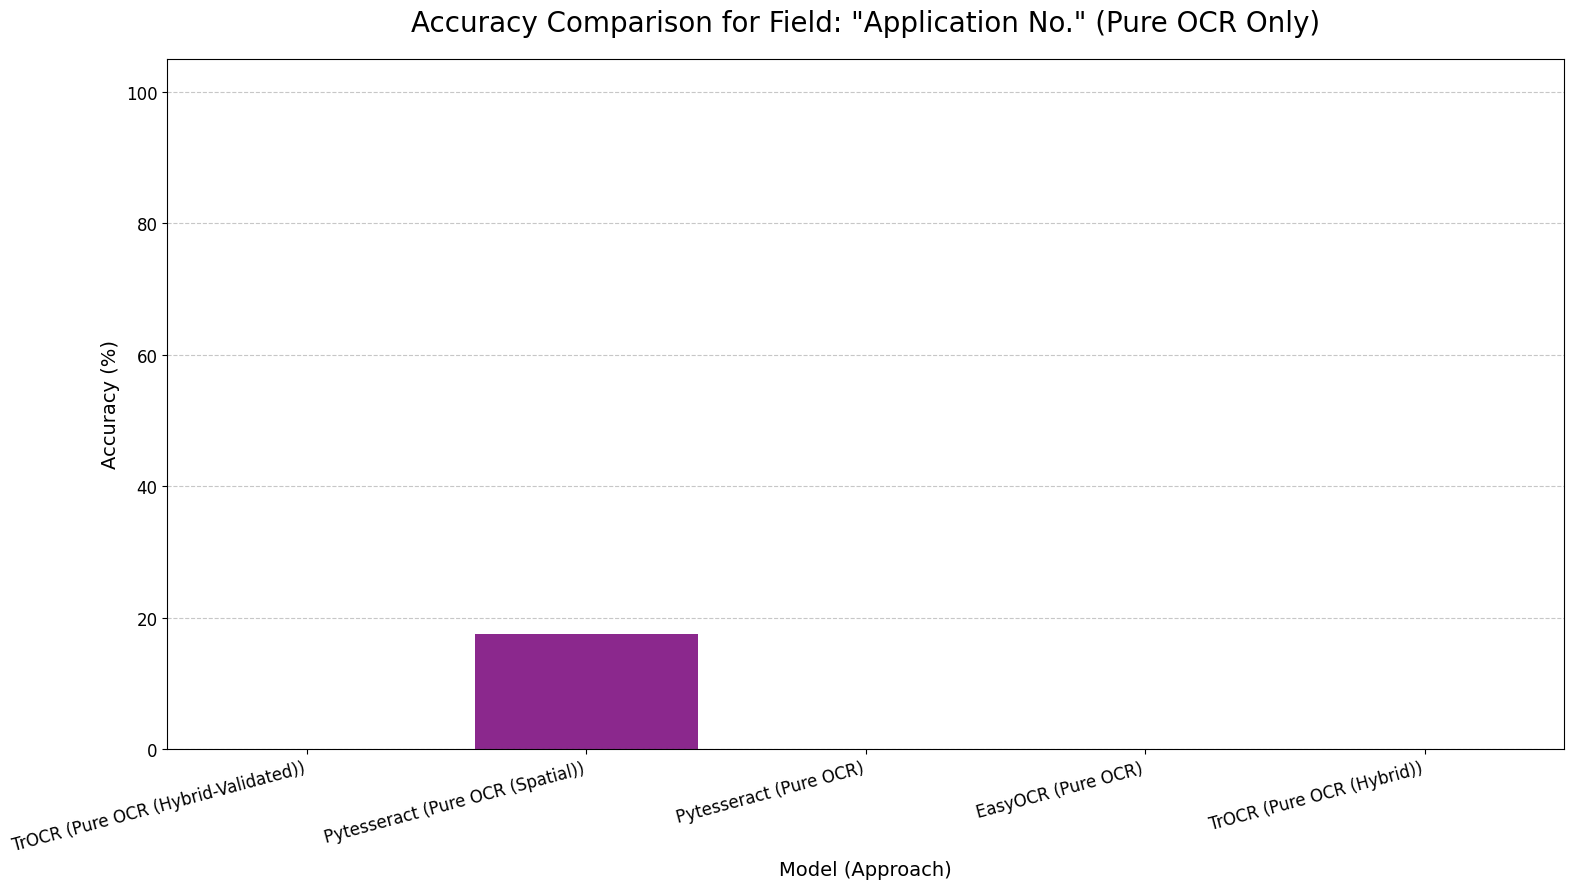

‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/3_pure_ocr_accuracy_heatmap.png


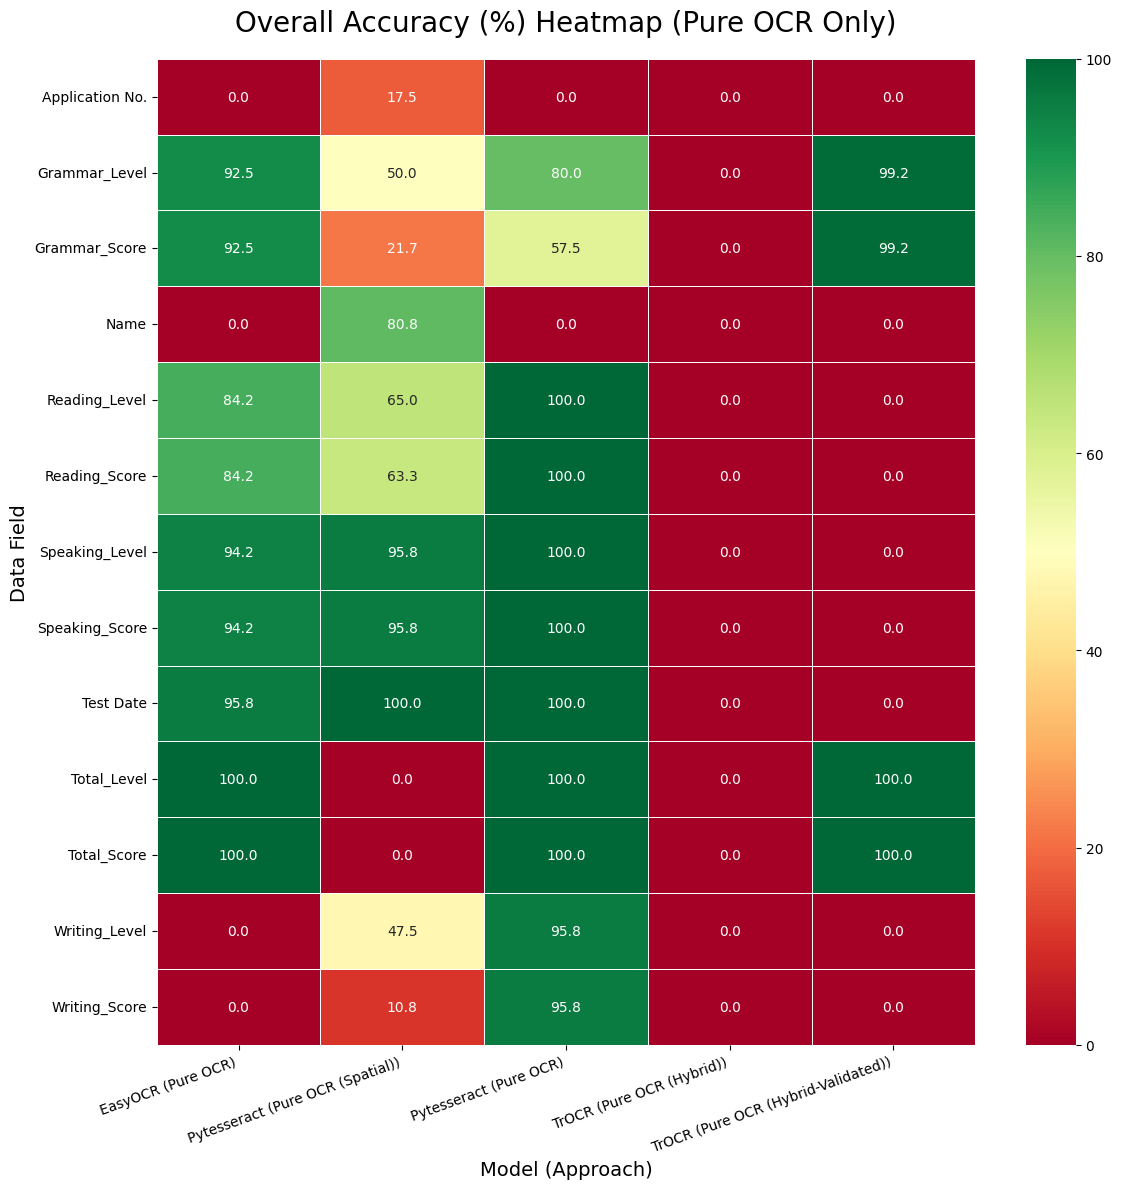

‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...
‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/1_pure_ocr_overall_performance.png


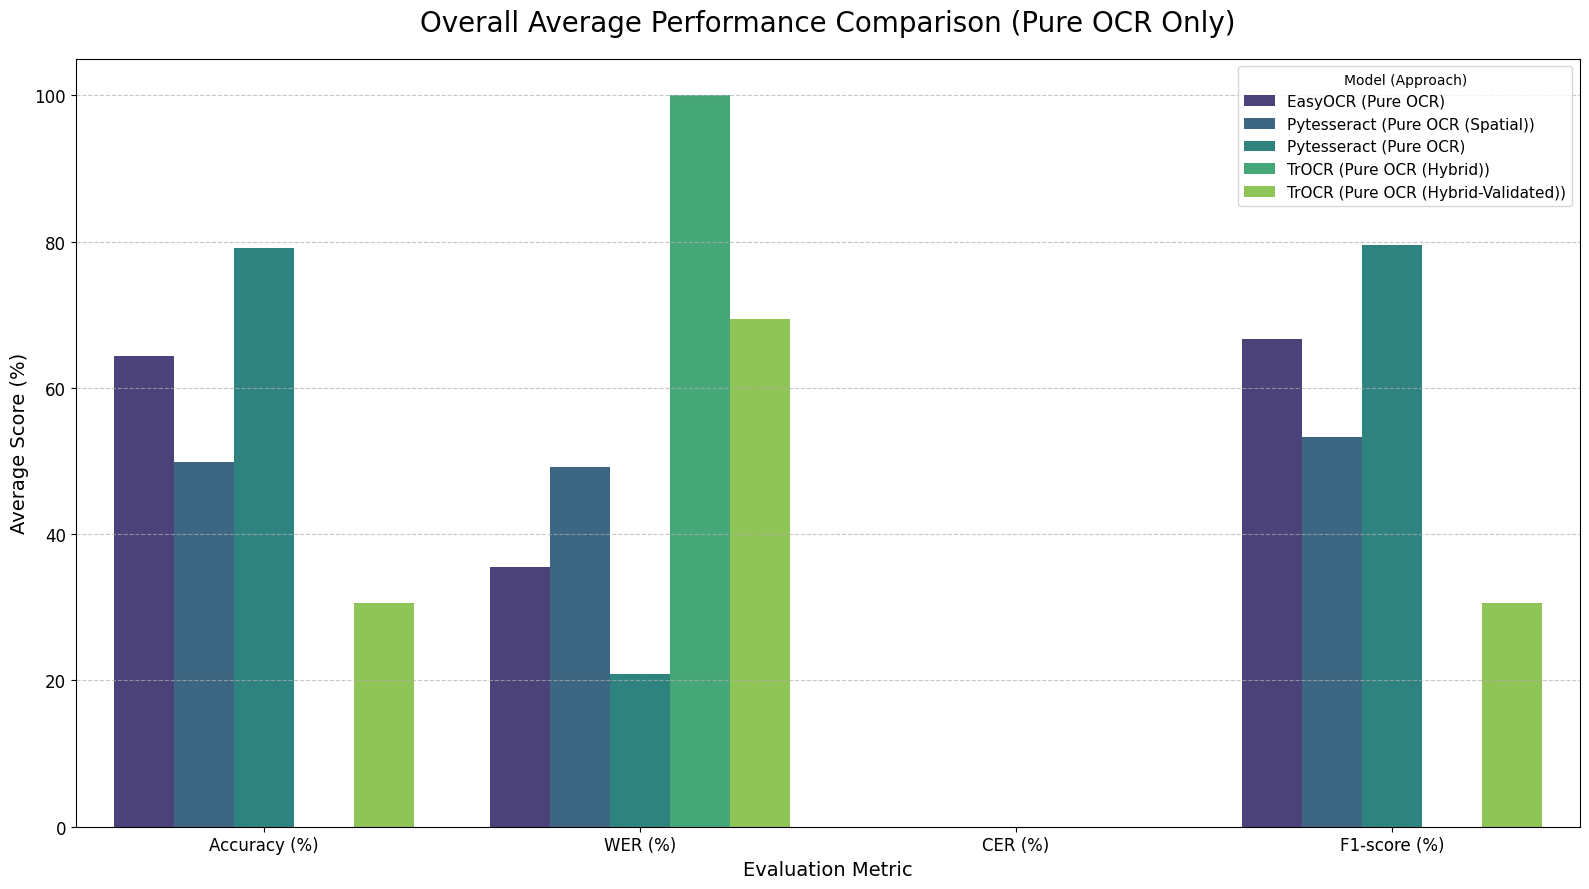

<ipython-input-23-4016833904>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Name) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Name.png


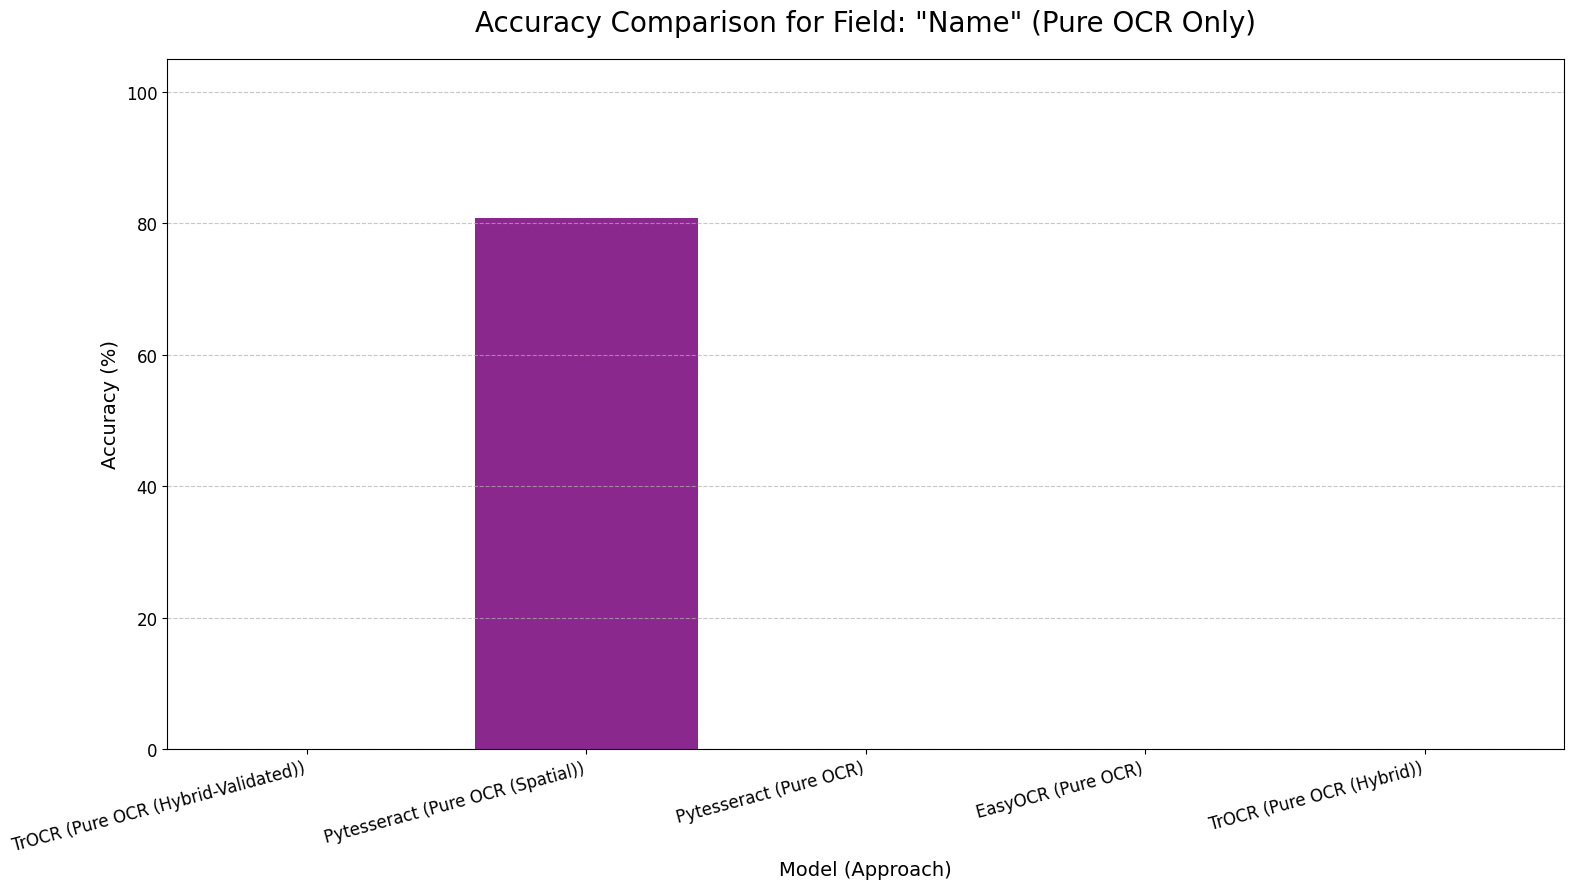

<ipython-input-23-4016833904>:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Application No.) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/2_pure_ocr_accuracy_for_Application_No..png


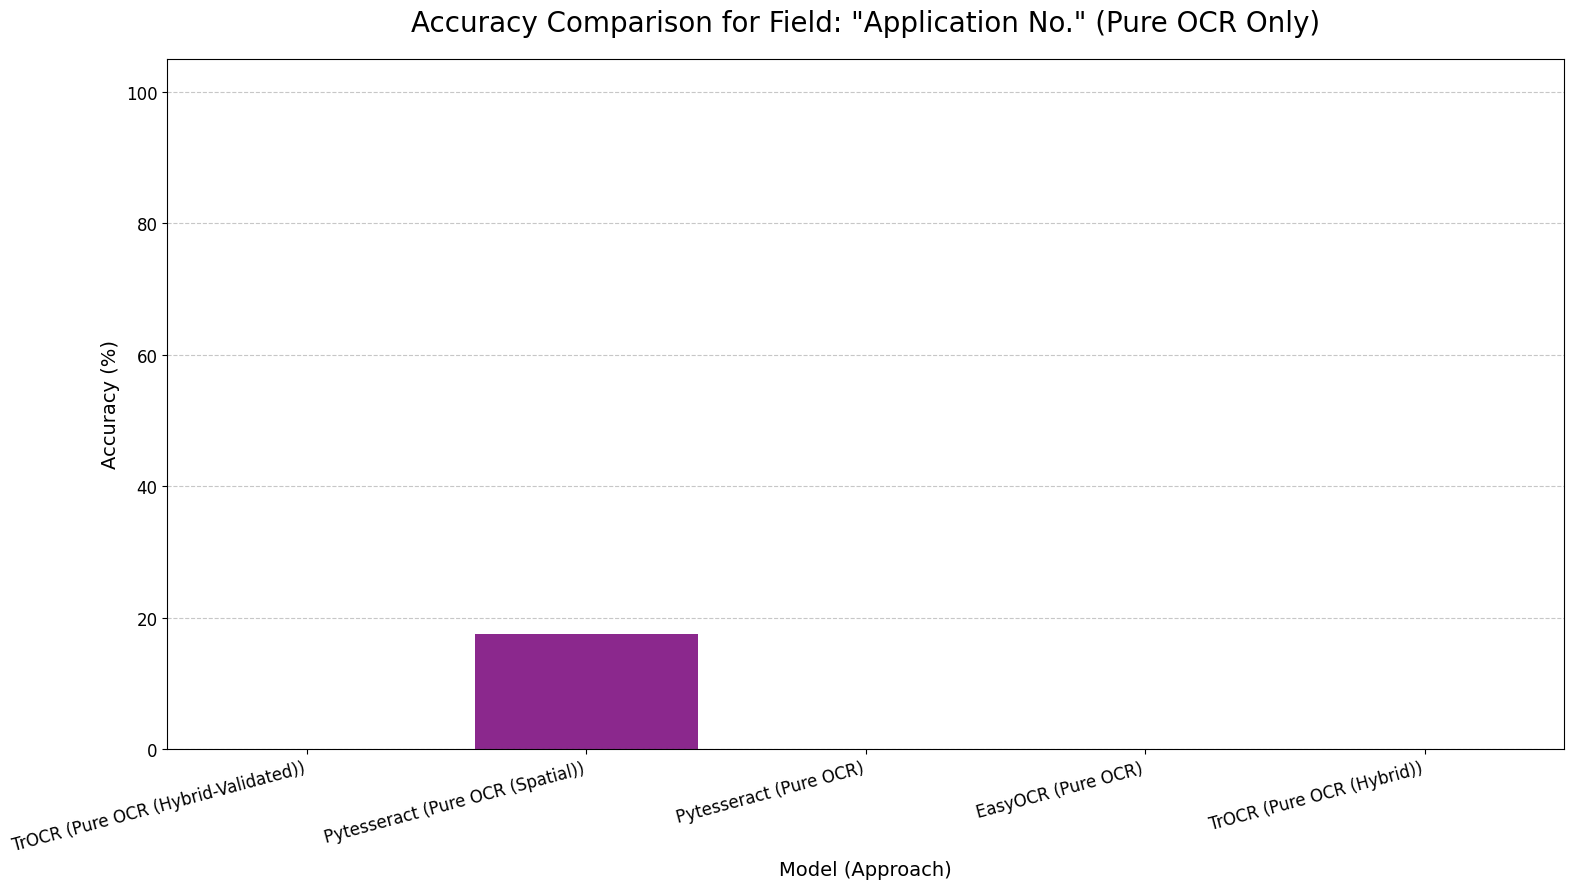

‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/3_pure_ocr_accuracy_heatmap.png


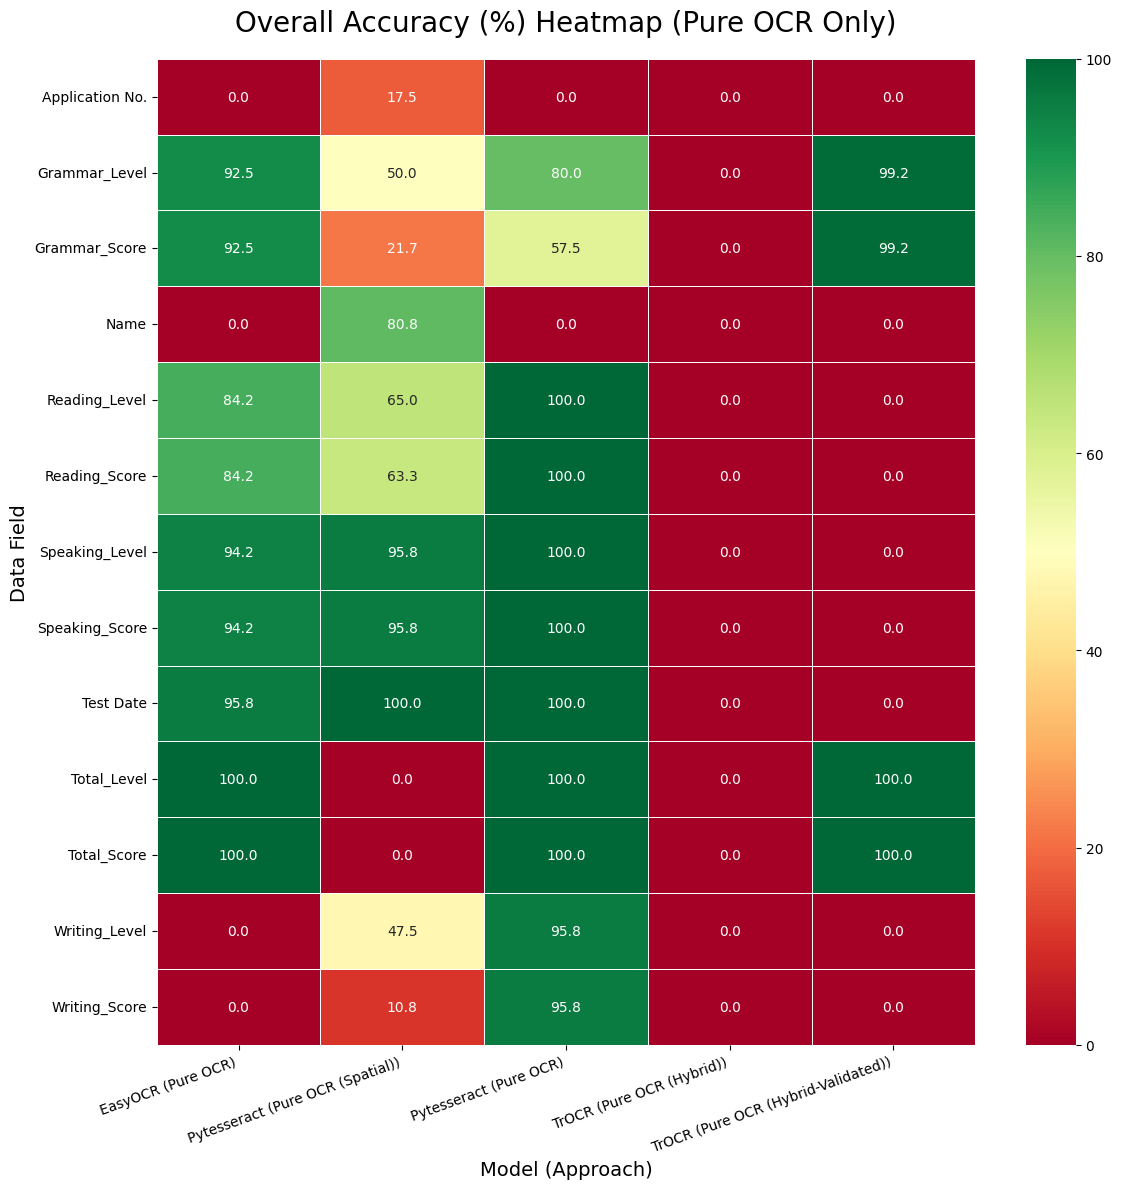

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/" # ‚¨ÖÔ∏è ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏£‡∏≤‡∏ü‡∏ä‡∏∏‡∏î‡∏ô‡∏µ‡πâ

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: {MASTER_REPORT_PATH}")
try:
    df_all = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"‚ùå ‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master Report! ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Path: {MASTER_REPORT_PATH}")
    exit()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs_pure_ocr/" # ‚¨ÖÔ∏è ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏£‡∏≤‡∏ü‡∏ä‡∏∏‡∏î‡∏ô‡∏µ‡πâ

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: {MASTER_REPORT_PATH}")
try:
    df_all = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"‚ùå ‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master Report! ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Path: {MASTER_REPORT_PATH}")
    exit()

# ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è ‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤: ‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏â‡∏û‡∏≤‡∏∞ Pure OCR ‚¨áÔ∏è‚¨áÔ∏è‚¨áÔ∏è
# ‡πÄ‡∏û‡∏¥‡πà‡∏° na=False ‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô .str.contains()
df = df_all[df_all['Approach'].str.contains('Pure OCR', case=False, na=False)].copy()
print("‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÅ‡∏ô‡∏ß‡∏ó‡∏≤‡∏á Pure OCR ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô")


print("‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡∏°‡πà‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏ä‡πâ‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏Å‡∏ô X ‡πÉ‡∏ô‡∏Å‡∏£‡∏≤‡∏ü‡πÉ‡∏´‡πâ‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1: ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÇ‡∏î‡∏¢‡∏£‡∏ß‡∏° (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡∏ü‡∏¥‡∏•‡∏î‡πå) ---
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph1_path = os.path.join(OUTPUT_DIR, '1_pure_ocr_overall_performance.png')
plt.savefig(graph1_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph1_path}")
plt.show()


# --- 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2: ‡πÄ‡∏à‡∏≤‡∏∞‡∏•‡∏∂‡∏Å‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ü‡∏¥‡∏•‡∏î‡πå (‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: Name ‡πÅ‡∏•‡∏∞ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}" (Pure OCR Only)', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
    graph2_path = os.path.join(OUTPUT_DIR, f'2_pure_ocr_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 ({field}) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph2_path}")
    plt.show()


# --- 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3: Heatmap ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ---
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(12, 12)) # ‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ô‡πâ‡∏≠‡∏¢‡∏•‡∏á
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph3_path = os.path.join(OUTPUT_DIR, '3_pure_ocr_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph3_path}")
plt.show()
print("‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡∏°‡πà‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏ä‡πâ‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏Å‡∏ô X ‡πÉ‡∏ô‡∏Å‡∏£‡∏≤‡∏ü‡πÉ‡∏´‡πâ‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1: ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÇ‡∏î‡∏¢‡∏£‡∏ß‡∏° (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡∏ü‡∏¥‡∏•‡∏î‡πå) ---
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph1_path = os.path.join(OUTPUT_DIR, '1_pure_ocr_overall_performance.png')
plt.savefig(graph1_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph1_path}")
plt.show()


# --- 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2: ‡πÄ‡∏à‡∏≤‡∏∞‡∏•‡∏∂‡∏Å‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ü‡∏¥‡∏•‡∏î‡πå (‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: Name ‡πÅ‡∏•‡∏∞ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}" (Pure OCR Only)', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
    graph2_path = os.path.join(OUTPUT_DIR, f'2_pure_ocr_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 ({field}) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph2_path}")
    plt.show()


# --- 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3: Heatmap ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ---
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(12, 12)) # ‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ô‡πâ‡∏≠‡∏¢‡∏•‡∏á
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap (Pure OCR Only)', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph3_path = os.path.join(OUTPUT_DIR, '3_pure_ocr_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph3_path}")
plt.show()

# Visualization all

In [24]:
pip install matplotlib seaborn

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: /content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx
‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...
‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/1_overall_performance.png


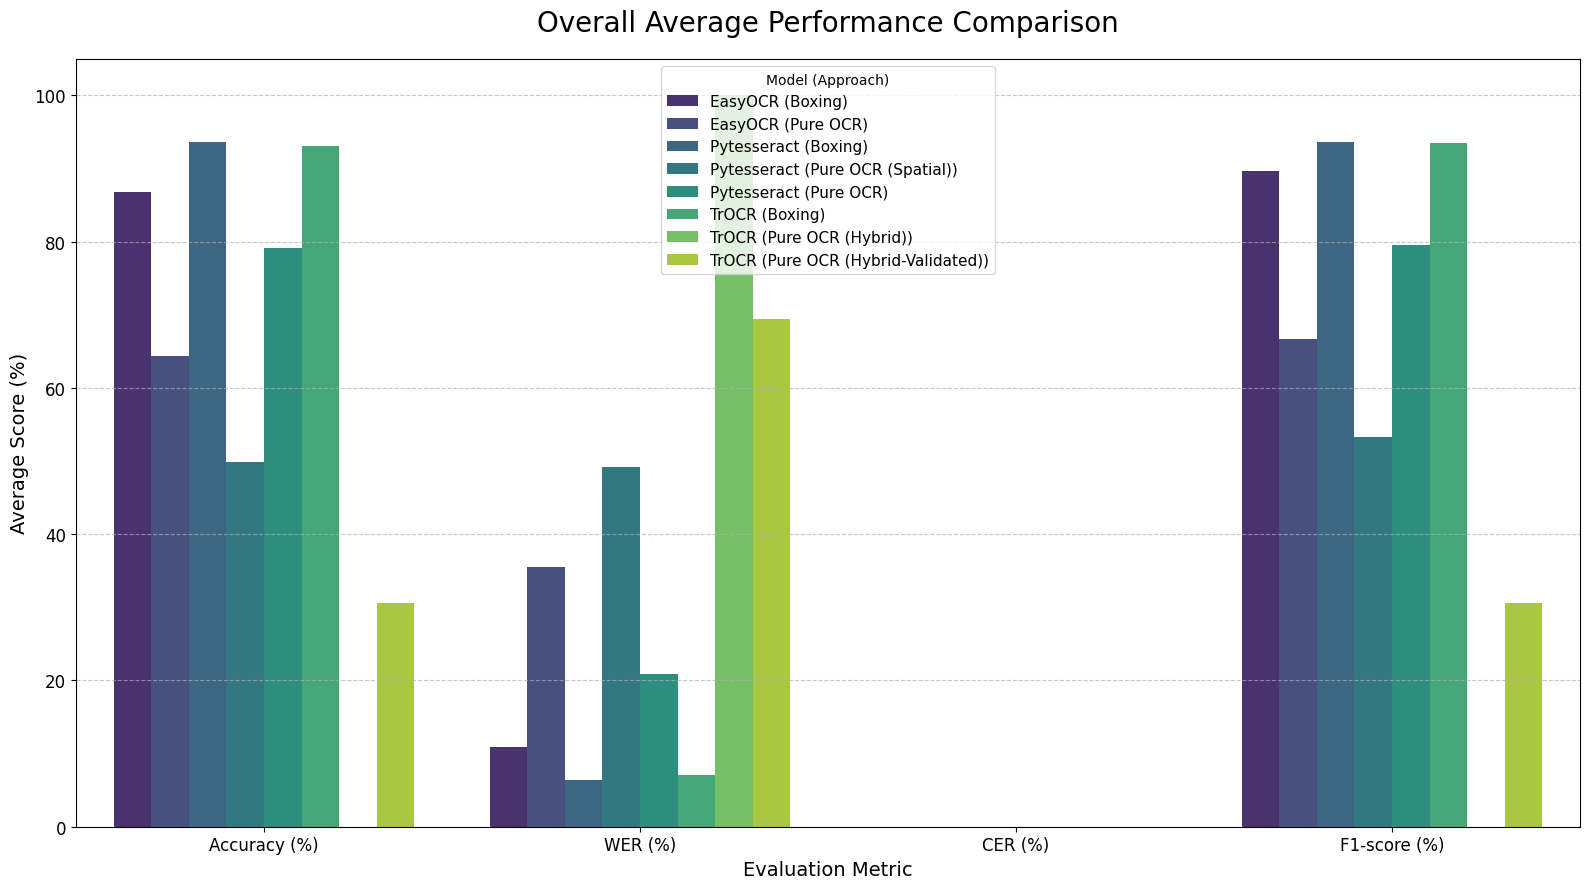

<ipython-input-25-2310019219>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Name) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/2_accuracy_for_Name.png


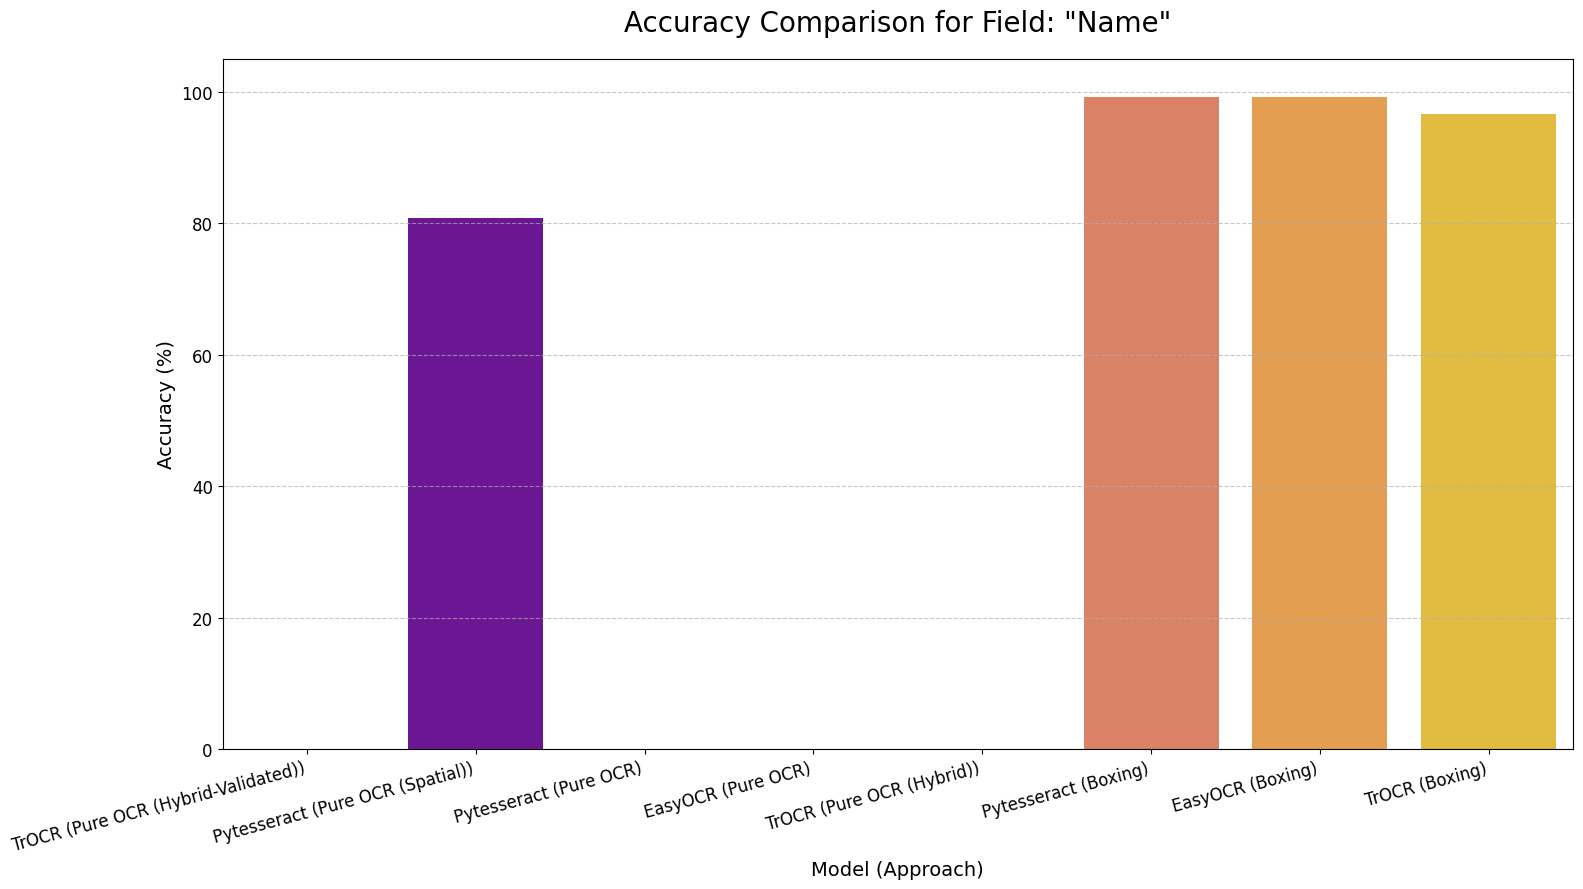

<ipython-input-25-2310019219>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')


‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 (Application No.) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/2_accuracy_for_Application_No..png


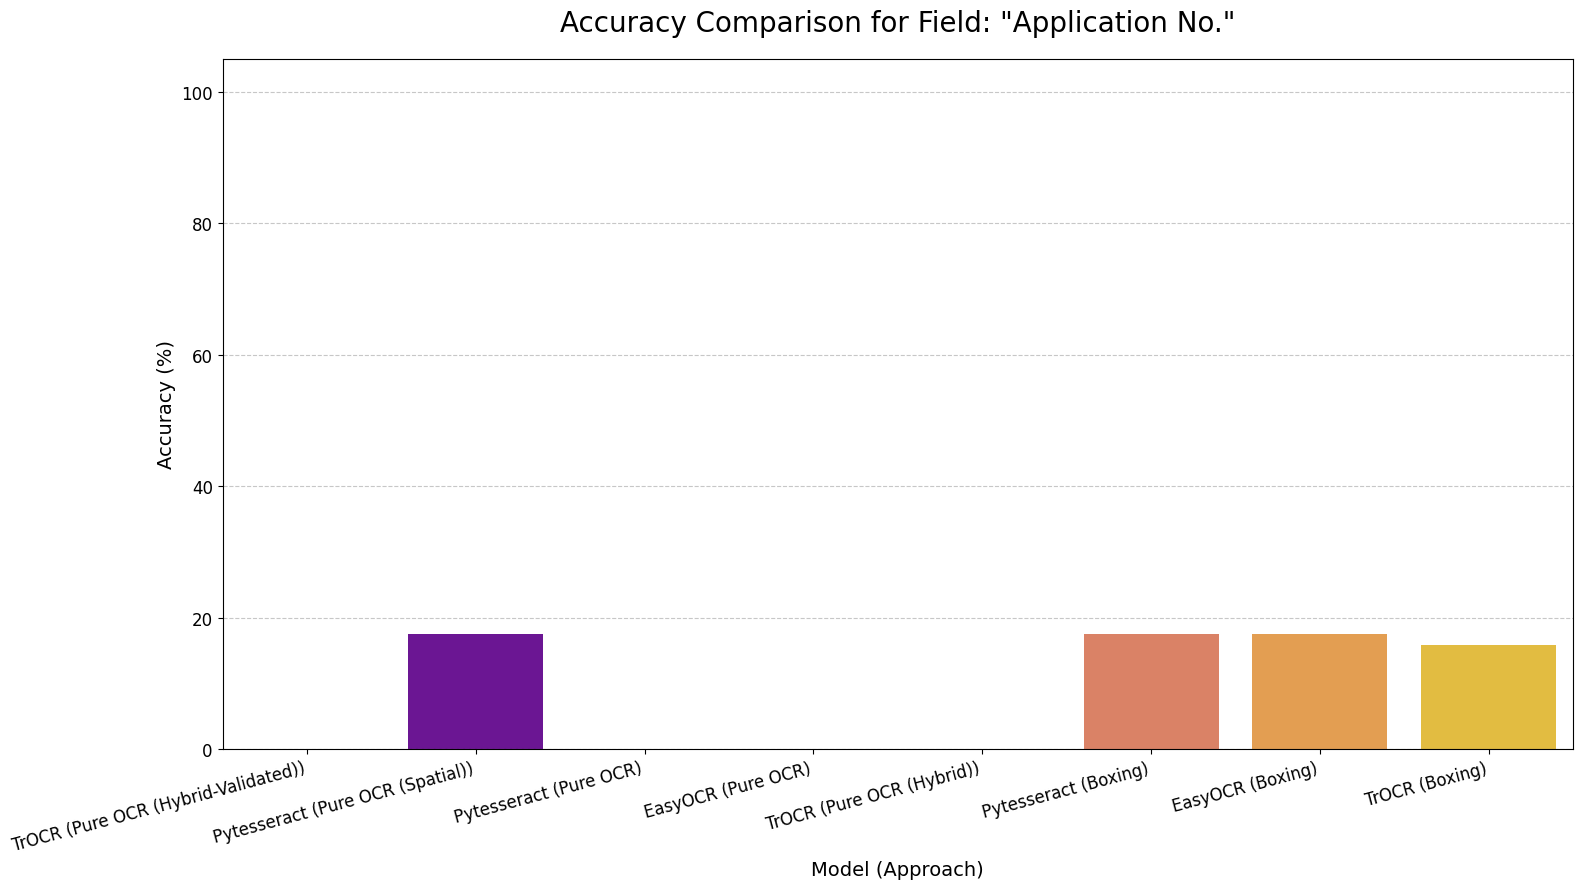

‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: /content/drive/MyDrive/kmitl_dataset/final-excel/graphs/3_accuracy_heatmap.png


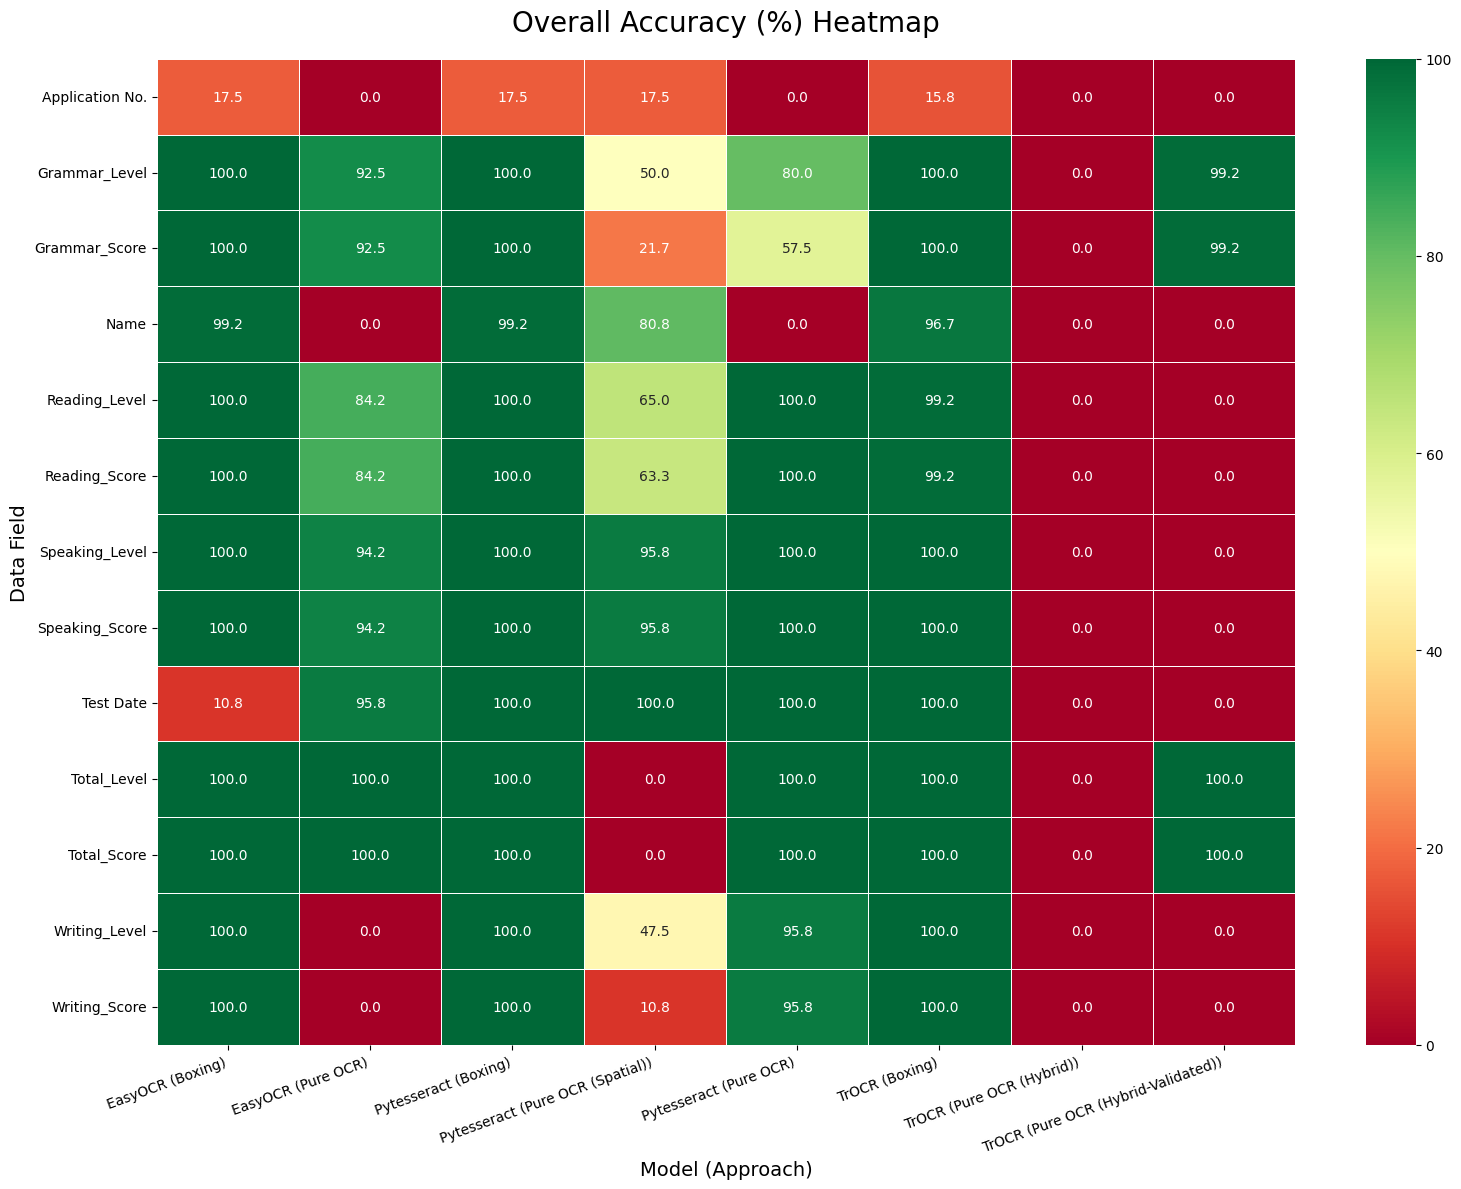

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤‡πÅ‡∏•‡∏∞‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
MASTER_REPORT_PATH = "/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx"
SHEET_NAME = 'Master_Evaluation'
OUTPUT_DIR = "/content/drive/MyDrive/kmitl_dataset/final-excel/graphs/" # ‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏Å‡∏£‡∏≤‡∏ü

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å: {MASTER_REPORT_PATH}")
try:
    df = pd.read_excel(MASTER_REPORT_PATH, sheet_name=SHEET_NAME)
except FileNotFoundError:
    print(f"‚ùå ‡πÑ‡∏°‡πà‡∏û‡∏ö‡πÑ‡∏ü‡∏•‡πå Master Report! ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Path: {MASTER_REPORT_PATH}")
    exit()

print("‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à! ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü...")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡∏°‡πà‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏ä‡πâ‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏Å‡∏ô X ‡πÉ‡∏ô‡∏Å‡∏£‡∏≤‡∏ü‡πÉ‡∏´‡πâ‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°
df['Model_Approach'] = df['Model'] + ' (' + df['Approach'] + ')'


# --- 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1: ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÇ‡∏î‡∏¢‡∏£‡∏ß‡∏° (‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡∏ü‡∏¥‡∏•‡∏î‡πå) ---
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞ Metric ‡πÇ‡∏î‡∏¢‡πÅ‡∏¢‡∏Å‡∏ï‡∏≤‡∏° Model ‡πÅ‡∏•‡∏∞ Approach
df_agg = df.groupby('Model_Approach')[['Accuracy (%)', 'WER (%)', 'CER (%)', 'F1-score (%)']].mean().reset_index()

# Melt DataFrame ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏á‡πà‡∏≤‡∏¢‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏î‡πâ‡∏ß‡∏¢ Seaborn
df_melted = df_agg.melt(id_vars='Model_Approach', var_name='Metric', value_name='Average Score')

plt.figure(figsize=(16, 9))
sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model_Approach', palette='viridis')
plt.title('Overall Average Performance Comparison', fontsize=20, pad=20)
plt.ylabel('Average Score (%)', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model (Approach)', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph1_path = os.path.join(OUTPUT_DIR, '1_overall_performance.png')
plt.savefig(graph1_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 1 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph1_path}")
plt.show()


# --- 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2: ‡πÄ‡∏à‡∏≤‡∏∞‡∏•‡∏∂‡∏Å‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ü‡∏¥‡∏•‡∏î‡πå (‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: Name ‡πÅ‡∏•‡∏∞ Application No.) ---
fields_to_plot = ['Name', 'Application No.']
for field in fields_to_plot:
    df_field = df[df['Field'] == field]

    plt.figure(figsize=(16, 9))
    sns.barplot(data=df_field, x='Model_Approach', y='Accuracy (%)', palette='plasma')
    plt.title(f'Accuracy Comparison for Field: "{field}"', fontsize=20, pad=20)
    plt.ylabel('Accuracy (%)', fontsize=14)
    plt.xlabel('Model (Approach)', fontsize=14)
    plt.xticks(rotation=15, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 105) # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÉ‡∏´‡πâ‡πÅ‡∏Å‡∏ô Y ‡πÄ‡∏ï‡πá‡∏° 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
    graph2_path = os.path.join(OUTPUT_DIR, f'2_accuracy_for_{field.replace(" ", "_")}.png')
    plt.savefig(graph2_path)
    print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 2 ({field}) ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph2_path}")
    plt.show()


# --- 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3: Heatmap ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ---
# ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ Accuracy ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏ä‡∏µ‡πâ‡∏ß‡∏±‡∏î‡∏´‡∏•‡∏±‡∏Å‡πÉ‡∏ô Heatmap
df_pivot = df.pivot_table(index='Field', columns='Model_Approach', values='Accuracy (%)')

plt.figure(figsize=(16, 12))
sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='RdYlGn', vmin=0, vmax=100)
plt.title('Overall Accuracy (%) Heatmap', fontsize=20, pad=20)
plt.ylabel('Data Field', fontsize=14)
plt.xlabel('Model (Approach)', fontsize=14)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü
graph3_path = os.path.join(OUTPUT_DIR, '3_accuracy_heatmap.png')
plt.savefig(graph3_path)
print(f"‚úÖ ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡πà 3 ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à: {graph3_path}")
plt.show()

In [26]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/kmitl_dataset/final-excel/final_comparison_report.xlsx')

# Display the first 5 rows
print(df.head().to_string(index=False))

# Print the column names and their data types
print(df.info())

# Get unique values in `Model` column
print(df['Model'].unique())

# Get unique values in `Approach` column
print(df['Approach'].unique())

# Group by `Model` and `Approach` and calculate the mean of the performance metrics
df_agg = df.groupby(['Model', 'Approach']).agg(
    Accuracy=('Accuracy (%)', 'mean'),
    WER=('WER (%)', 'mean'),
    CER=('CER (%)', 'mean'),
    F1_score=('F1-score (%)', 'mean')
).reset_index()

# Print the aggregated DataFrame
print(df_agg.to_string(index=False))

Model                    Approach           Field  Accuracy (%)  WER (%)  CER (%)  F1-score (%)
TrOCR Pure OCR (Hybrid-Validated)            Name          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated) Application No.          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated)       Test Date          0.00   100.00      0.0          0.00
TrOCR Pure OCR (Hybrid-Validated)   Grammar_Level         99.17     0.83      0.0         99.17
TrOCR Pure OCR (Hybrid-Validated)   Grammar_Score         99.17     0.83      0.0         99.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         105 non-null    object 
 1   Approach      104 non-null    object 
 2   Field         104 non-null    object 
 3   Accuracy (%)  104 non-null    float64
 4   WER (%)       104 non-null    float64
 5   CER (%)       